# Project Part 2: Amazon Beauty Products

In [1]:
#from google.colab import drive
#drive.mount('/content/drive/', force_remount=True)
path=''#/content/drive/Shareddrives/Introduction to Data Science/data/'

## 1.0 Introduction

Importing some libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import datetime
import matplotlib
import json
from scipy.stats import gaussian_kde
from scipy.stats import zscore
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 

## 2.0 Loading Datasets 

Getting familiar with the data we have

### 2.1 meta_All_Beauty.json

This dataset contains all the product details

In [3]:
import json
import numpy as np
import pandas as pd

product = []
with open(path + 'meta_All_Beauty.json') as f:
    for line in f:
        product.append(json.loads(line))

In [4]:
raw_product_table = pd.DataFrame(product)
raw_product_table.head(10)

category tech1                                        description fit  \
0       []        [Loud 'N Clear Personal Sound Amplifier allows...       
1       []        [No7 Lift & Luminate Triple Action Serum 50ml ...       
2       []        [No7 Stay Perfect Foundation now stays perfect...       
3       []                                                       []       
4       []        [Lacto Calamine Skin Balance Daily Nourishing ...       
5       []        [Mary Kay Satin Hands Peach Hand Cream Travel ...       
6       []                                                       []       
7       []        [According to the legend, in 1613, two brother...       
8       []        [Novi prevod proslavljene knjige Zadruga objav...       
9       []        [Moleskine's Card Wallet in Payne's Grey is th...       

                                               title  \
0      Loud 'N Clear&trade; Personal Sound Amplifier   
1  No7 Lift &amp; Luminate Triple Action Serum 50...   
2    No7 Stay Perfect Foundation Cool Vanilla by No7   
3  Wella Koleston Perfect Hair Colour 44/44 Mediu...   
4  Lacto Calamine Skin Balance Oil control 120 ml...   
5  Mary Kay Satin Hands Hand Cream Travel MINI Si...   
6  Unique Custom Cast Iron Liner Shader Tattoo Ma...   
7  Imagen Bendita Por Su Santidad Our Lady of Cha...   
8                                         Mali princ   
9  Moleskine Payne's Grey Card Wallet (Moleskine ...   

                   also_buy  \
0                        []   
1  [B01E7LCSL6, B008X5RVME]   
2                        []   
3              [B0041PBXX8]   
4                        []   
5                        []   
6                        []   
7                        []   
8                        []   
9                        []   

                                               image tech2  \
0                                                 []         
1                                                 []         
2                                                 []         
3  [https://images-na.ssl-images-amazon.com/image...         
4  [https://images-na.ssl-images-amazon.com/image...         
5                                                 []         
6                                                 []         
7                                                 []         
8  [https://images-na.ssl-images-amazon.com/image...         
9  [https://images-na.ssl-images-amazon.com/image...         

                      brand feature  \
0              idea village      []   
1                                []   
2                       No7      []   
3                                []   
4         Pirmal Healthcare      []   
5                  Mary Kay      []   
6                                []   
7                    Chango      []   
8  Srpska knjizevna zadruga      []   
9                 Sunatoria      []   

                                        rank  \
0      2,938,573 in Beauty & Personal Care (   
1        872,854 in Beauty & Personal Care (   
2        956,696 in Beauty & Personal Care (   
3      1,870,258 in Beauty & Personal Care (   
4         67,701 in Beauty & Personal Care (   
5        699,317 in Beauty & Personal Care (   
6      3,206,658 in Beauty & Personal Care (   
7      1,741,858 in Beauty & Personal Care (   
8  2,136,432 in Beauty &amp; Personal Care (   
9  1,260,339 in Beauty &amp; Personal Care (   

                                           also_view  \
0                                                 []   
1                                                 []   
2               [B01B8BR0O8, B01B8BR0NO, B014MHXXM8]   
3                                                 []   
4  [3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...   
5                                                 []   
6                                                 []   
7                                                 []   
8                                                 []   
9              

### 2.2 Review_Beauty.json

This file contains all the review given by customers.

In [5]:
import json
import numpy as np
import pandas as pd

review = []
with open(path + 'Review_Beauty.json') as f:
    for line in f:
        review.append(json.loads(line))

In [6]:
raw_review_table = pd.DataFrame(review)
raw_review_table.head(10)

overall  verified   reviewTime      reviewerID        asin  \
0      1.0      True  02 19, 2015  A1V6B6TNIC10QE  0143026860   
1      4.0      True  12 18, 2014  A2F5GHSXFQ0W6J  0143026860   
2      4.0      True  08 10, 2014  A1572GUYS7DGSR  0143026860   
3      5.0      True  03 11, 2013   A1PSGLFK1NSVO  0143026860   
4      5.0      True  12 25, 2011   A6IKXKZMTKGSC  0143026860   
5      5.0     False  02 26, 2010  A36NF437WZLQ9E  0143026860   
6      4.0     False   03 7, 2001  A10Q8NIFOVOHFV  0143026860   
7      1.0      True  04 10, 2017  A26PO1B2Q2G1CS  014789302X   
8      5.0      True   01 3, 2017   AQ812VYVTC2RJ  014789302X   
9      1.0      True  11 19, 2016   AMACNEW14ADMX  014789302X   

         reviewerName                                         reviewText  \
0   theodore j bigham                                              great   
1        Mary K. Byke  My  husband wanted to reading about the Negro ...   
2             David G  This book was very informative, covering all a...   
3                TamB  I am already a baseball fan and knew a bit abo...   
4          shoecanary  This was a good story of the Black leagues. I ...   
5           W. Powell  Today I gave a book about the Negro Leagues of...   
6  Robert S. Clay Jr.  The story of race relations in American histor...   
7     Jacqueline Diaz  I didn't like this product it smudged all unde...   
8  Khadijah Ali-Evans  I simply love the product. I appreciate print ...   
9          rabiyaa123  it burns your eyes when u put it on  and very ...   

                                             summary  unixReviewTime vote  \
0                                           One Star      1424304000  NaN   
1  ... to reading about the Negro Baseball and th...      1418860800  NaN   
2                                     Worth the Read      1407628800  NaN   
3                                          Good Read      1362960000  NaN   
4                More than facts, a good story read!      1324771200    5   
5                         The Gift of Black Baseball      1267142400    4   
6                     Baseball, America, and racism.       983923200   14   
7                                           One Star      1491782400  NaN   
8                                         Five Stars      1483401600  NaN   
9                                i do not recommend.      1479513600    3   

  style image  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  
5   NaN   NaN  
6   NaN   NaN  
7   NaN   NaN  
8   NaN   NaN  
9   NaN   NaN

### 2.3 All_Beauty.csv

csv file provide by lecturer.

In [7]:
header_names = ['ProductID', 'UserID', 'Review', 'Date']
review_simplified = pd.read_csv(path + 'All_Beauty.csv', header=None, names=header_names)
review_simplified.head(10)

ProductID          UserID  Review        Date
0   0143026860  A1V6B6TNIC10QE     1.0  1424304000
1   0143026860  A2F5GHSXFQ0W6J     4.0  1418860800
2   0143026860  A1572GUYS7DGSR     4.0  1407628800
3   0143026860   A1PSGLFK1NSVO     5.0  1362960000
4   0143026860   A6IKXKZMTKGSC     5.0  1324771200
5   0143026860  A36NF437WZLQ9E     5.0  1267142400
6   0143026860  A10Q8NIFOVOHFV     4.0   983923200
7   014789302X  A26PO1B2Q2G1CS     1.0  1491782400
8   014789302X   AQ812VYVTC2RJ     5.0  1483401600
9   014789302X   AMACNEW14ADMX     1.0  1479513600
10  014789302X   A5FS4FVWR77O6     2.0  1478736000
11  014789302X  A1NLF2JD7BVOB4     5.0  1474848000
12  014789302X  A3CKVF2ZR1CBO0     4.0  1470355200
13  014789302X  A3IFT6SR16SAYU     5.0  1469750400
14  014789302X  A2BQ7NB90SBVIA     5.0  1466208000
15  014789302X   A92AYWTA52KXE     5.0  1464134400
16  014789302X   AR6LNUWXJFYE6     5.0  1458950400
17  0992916305  A2V9BG2MDQVCYX     5.0  1422748800
18  0992916305   AIL9Q82L1G2YO     5.0  1422576000
19  0992916305  A1ROGN2QPKZGP7     4.0  1417392000
20  0992916305  A141Z5WI6GVM6Y     5.0  1415750400
21  0992916305  A1M3JNGXB8IU7I     5.0  1409788800
22  0992916305  A3NYLVMP922AE5     5.0  1406160000
23  1620213982  A1DN3KBTCYBH6K     5.0  1337126400
24  1620213982  A1TA38LWZO0NZS     5.0  1330214400
25  1620213982  A2OZBC5SG575G1     5.0  1326672000
26  1620213982  A2YKYIA11M9XTX     5.0  1322092800
27  1620213982  A32MUH70JIV7TS     5.0  1319846400
28  1620213982  A3S57667R6V4S4     5.0  1314403200
29  1620213982  A3JLEHAK528W8Z     5.0  1304035200
30  1620213982  A1XA71UE5A7F5B     5.0  1288483200
31  1620213982  A3BEXXPM77KR5Z     5.0  1284422400
32  1620213982   A9KCT397IWK97     5.0  1525737600
33  1620213982  A36Z95ZFDMNL99     5.0  1525737600
34  1620213982   AB6RYXLZSKHIR     5.0  1525564800
35  1620213982  A210V878QFZW9V     5.0  1525305600
36  1620213982  A18WMBY4BAB7ES     5.0  1525219200
37  1620213982  A2667UCM2FYMQ5     2.0  1525132800
38  1620213982   AQ3IBZ523E9NP     4.0  1524873600
39  1620213982  A2Q6ZCAOTIKW5A     5.0  1524873600
40  1620213982  A2HJQ1TBXTHXFQ     2.0  1524700800
41  1620213982  A33JNJ0DGA6JRU     4.0  1524700800
42  1620213982  A1KF66E65YEALF     5.0  1524700800
43  1620213982   AYYITJTFJCA77     5.0  1524614400
44  1620213982  A35GAM2X7G7LAI     5.0  1524009600
45  1620213982  A1Z8A548Z31SUB     2.0  1523923200
46  1620213982   A2XBDWQ3Z8GZM     4.0  1523923200
47  1620213982  A2FT0AFHQ32G33     5.0  1523836800
48  1620213982   AIVFUM7JDR4KM     5.0  1523664000
49  1620213982  A12GV837WV9DA2     5.0  1523491200

In [8]:
review_simplified.shape

(371345, 4)

### 2.4 Luxury_Beauty.json

Additional dataset that is used mainly for predictive modelling part. This file contains all the review given by customers for luxury beauty product

In [9]:
import json
import numpy as np
import pandas as pd

luxuryBeautyReview = []
with open(path + 'Luxury_Beauty.json') as f:
    for line in f:
        luxuryBeautyReview.append(json.loads(line))

In [10]:
raw_luxuryBeautyReview = pd.DataFrame(luxuryBeautyReview)
raw_luxuryBeautyReview

overall vote  verified   reviewTime      reviewerID        asin  \
0           2.0    3      True  06 15, 2010  A1Q6MUU0B2ZDQG  B00004U9V2   
1           5.0   14      True   01 7, 2010  A3HO2SQDCZIE9S  B00004U9V2   
2           5.0  NaN      True  04 18, 2018  A2EM03F99X3RJZ  B00004U9V2   
3           5.0  NaN      True  04 18, 2018   A3Z74TDRGD0HU  B00004U9V2   
4           5.0  NaN      True  04 17, 2018  A2UXFNW9RTL4VM  B00004U9V2   
...         ...  ...       ...          ...             ...         ...   
574623      5.0  NaN      True  03 20, 2017   AHYJ78MVF4UQO  B01HIQEOLO   
574624      5.0  NaN      True  10 26, 2016  A1L2RT7KBNK02K  B01HIQEOLO   
574625      5.0  NaN      True  09 30, 2016  A36MLXQX9WPPW9  B01HIQEOLO   
574626      1.0    2      True   12 5, 2016  A23DRCOMC2RIXF  B01HJ2UY0W   
574627      5.0  NaN      True  01 14, 2017   AJEDVHTLS9P3V  B01HJ2UY1G   

           reviewerName                                         reviewText  \
0             D. Poston  I bought two of these 8.5 fl oz hand cream, an...   
1               chandra  Believe me, over the years I have tried many, ...   
2             Maureen G                                  Great hand lotion   
3               Terry K  This is the best for the severely dry skin on ...   
4         Patricia Wood  The best non- oily hand cream ever. It heals o...   
...                 ...                                                ...   
574623         Lori Fox          Great color and I prefer shellac over gel   
574624            Elena  Best shellac I have ever used.  It doesn't tak...   
574625  Donna D. Harris                 Great polish and beautiful color!!   
574626        Y.Y. Chen  The perfume is good, but the spray head broke ...   
574627       ML Shelton                                   Great fragrance.   

                                    summary  unixReviewTime  \
0                     dispensers don't work      1276560000   
1                     Best hand cream ever.      1262822400   
2                                Five Stars      1524009600   
3                                Five Stars      1524009600   
4             I always have a backup ready.      1523923200   
...                                     ...             ...   
574623                           Five Stars      1489968000   
574624        Best shellac I have ever used      1477440000   
574625                        Great polish!      1475193600   
574626  Spray head broke off within a month      1480896000   
574627                           Five Stars      1484352000   

                                                    style image  
0                                                     NaN   NaN  
1                                                     NaN   NaN  
2                                   {'Size:': ' 3.5 oz.'}   NaN  
3                                   {'Size:': ' 3.5 oz.'}   NaN  
4                                   {'Size:': ' 3.5 oz.'}   NaN  
...                                                   ...   ...  
574623                                                NaN   NaN  
574624                                                NaN   NaN  
574625                                                NaN   NaN  
574626  {'Size:': ' 1.7 Fluid Ounce', 'Color:': ' Multi'}   NaN  
574627  {'Size:': ' 3.4 Fluid Ounce', 'Color:': ' Multi'}   NaN  

[574628 rows x 12 columns]

### 2.5 meta_Luxury_Beauty.json

Additional dataset that is used mainly for predictive modelling part. This file contains all the luxury beauty product details.

In [11]:
import json
import numpy as np
import pandas as pd

luxuryBeautyProduct = []
with open(path + 'meta_Luxury_Beauty.json') as f:
    for line in f:
        luxuryBeautyProduct.append(json.loads(line))

In [12]:
raw_luxuryBeautyProduct = pd.DataFrame(luxuryBeautyProduct)
raw_luxuryBeautyProduct

category tech1                                        description fit  \
0           []        [After a long day of handling thorny situation...       
1           []        [If you haven't experienced the pleasures of b...       
2           []        [Rich, black mineral mud, harvested from the b...       
3           []        [This liquid soap with convenient pump dispens...       
4           []        [Remember why you love your favorite blanket? ...       
...        ...   ...                                                ...  ..   
12294       []        [, CND Craft Culture Collection: Patina Buckle...       
12295       []        [CND Shellac was designed to be used as a syst...       
12296       []        [CND Shellac was designed to be used as a syst...       
12297       []        [The I AM JUICY COUTURE girl is once again tak...       
12298       []        [I Love Juicy Couture Eau De Parfum Spray 3.4 ...       

                                                   title  \
0      Crabtree &amp; Evelyn - Gardener's Ultra-Moist...   
1                                       AHAVA Bath Salts   
2          AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4   
3      Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...   
4                                     Soy Milk Hand Crme   
...                                                  ...   
12294            CND Shellac Power Polish, Patina Buckle   
12295               CND Shellac power polish denim patch   
12296                       CND Shellac, Leather Satchel   
12297  Juicy Couture I Love Juicy Couture, 1.7 fl. Oz...   
12298  Juicy Couture I Love Juicy Couture, 3.4 fl. Oz...   

                                                also_buy  \
0      [B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...   
1                                                     []   
2                                                     []   
3                                                     []   
4      [B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...   
...                                                  ...   
12294  [B003ONLAXQ, B00YDEZ9T6, B074KHRD13, B00R3PZK1...   
12295  [B003ONLAXQ, B003OH0KBA, B004LEMWGG, B01MT91G4...   
12296  [B003ONLAXQ, B003OH0KBA, B004LEMWGG, B01MT91G4...   
12297                                                 []   
12298                                       [B071NZZW3K]   

                                                   image tech2 brand feature  \
0      [https://images-na.ssl-images-amazon.com/image...                  []   
1                                                     []                  []   
2      [https://images-na.ssl-images-amazon.com/image...                  []   
3      [https://images-na.ssl-images-amazon.com/image...                  []   
4      [https://images-na.ssl-images-amazon.com/image...                  []   
...                                                  ...   ...   ...     ...   
12294                                                 []                  []   
12295                                                 []                  []   
12296  [https://images-na.ssl-images-amazon.com/image...                  []   
12297  [https://images-na.ssl-images-amazon.com/image...                  []   
12298  [https://images-na.ssl-images-amazon.com/image...                  []   

                                            rank  \
0              4,324 in Beauty & Personal Care (   
1          1,633,549 in Beauty & Personal Care (   
2      1,806,710 in Beauty &amp; Personal Care (   
3                                             []   
4         42,464 in Beauty &amp; Personal Care (   
...                                          ...   
12294         88,740 in Beauty & Personal Care (   
12295        122,331 in Beauty & Personal Care (   
12296        168,028 in Beauty & Personal Care (   
12297        490,755 in Beauty & Personal Care (   
12298        181,383 in Beauty & Personal Care (   

                             

## 3.0 Data Cleaning

Cleaning our data, which includes the steps below:

Step 1 : Remove duplicates or irrelevant observations

Step 2 : Fix structural errors

Step 3 : Identify and handle outliers

Step 4 : Handle missing data


### 3.1 Cleaning meta_All_Beauty.json

Which is now loaded into Product (a DataFrame)

In [13]:
#drop irrelevant observations
product_table = raw_product_table.drop(['category','tech1','description', 'fit','image','tech2','feature','main_cat','similar_item','date'], axis=1)


In [14]:
# some ASIN inside details has space after 
# example  'ASIN: ' vs 'ASIN:'
# but going to drop 'details' because didn't use it
# this is to check whether the asin and the ASIN inside details is correct

count = 0
index_to_drop = [] 

for i in range(len(product_table.index)):
    dct = product_table['details'].iloc[i]
    if 'ASIN: ' in dct: 
        asin = dct['ASIN: ']
    elif 'ASIN:' in dct:
        asin = dct['ASIN:']
    if asin != product_table['asin'].iloc[i]:
        index_to_drop.append(i)
        count += 1
        
print(count)

437


In [15]:
##drop irrelevant observations
product_table = raw_product_table.drop(['category','tech1','description','fit','image','tech2','brand','feature','main_cat','similar_item','date','details'],axis = 1)

##drop duplicates
#no duplicate asins and row
product_table.drop_duplicates(['asin'],inplace = True)
product_table.reset_index(drop=True, inplace=True)

##fix structural errors

#for column 'rank' 
#remove uneccessary symbol like comma ',' and words
#convert the string into integer 
product_table['rank'].replace(',','', regex=True, inplace=True)
product_table['rank'] = product_table['rank'].str.extract('(\d+)')

#for column 'price'
#if 'price' don't start with $ or has '-' means null value, fillna with 'unknown'
#remove uneccessary symbol like comma ',' and '$'
product_table.loc[product_table["price"].str[0] != "$", "price"] = "unknown"
product_table.loc[product_table["price"].str.contains('-'), "price"] = "unknown"
product_table['price'].replace("\$","", regex=True, inplace=True)
product_table['price'].replace(',','', regex=True, inplace=True)

##deal with missing data
#missing data in 'rank' and 'price'
#product_table.replace('\[]','', regex=True, inplace=True)
product_table['rank'].fillna(0,inplace = True)
product_table['price'].replace("unknown",0, regex=True, inplace=True)
product_table.fillna("unknown",inplace = True)

##changing data type
product_table['rank']= product_table['rank'].astype(int)
product_table['price'] = product_table['price'].apply(pd.to_numeric)

##Identify and handle outliers
z_scores = stats.zscore(pd.DataFrame(product_table['rank']))
abs_z_scores = np.abs(z_scores)
outlier = (abs_z_scores > 3).all(axis=1)
product_table.drop(product_table[outlier].index, inplace = True)

product_table.shape

(32487, 6)

In [16]:
unique = product_table["asin"].value_counts()
unique

B000NVR94G    1
B01BCMWFPM    1
B00S4C8BOS    1
B00WSU0UIW    1
B004G09CCC    1
             ..
B00IAA34KU    1
B01EQV9G4O    1
B00JZ5F8F8    1
B00QMVYSIG    1
B001205296    1
Name: asin, Length: 32487, dtype: int64

### 3.2 Cleaning Review_Beauty.json
Which is now loaded into review (a DataFrame)

In [17]:
##drop irrelevant observations
review_table = raw_review_table.drop(['reviewerName','reviewText','summary','style','image'],axis = 1)

##drop duplicates
review_table.drop_duplicates(inplace = True)
review_table.reset_index(drop=True, inplace=True)

##fix structural errors
#for column 'vote'
#remove uneccessary symbol ','
review_table['vote'].replace(',','', regex=True, inplace=True)
test_review_table = review_table.copy(deep=True)

##deal with missing data
review_table['vote'].fillna(0,inplace = True)
review_table.fillna('unknown',inplace = True)

##changing data type
review_table['vote'] = review_table['vote'].astype(int)

#separate reviewTime into three different columns
review_table['reviewTime'].replace(',','', regex=True, inplace=True)
date = review_table['reviewTime'].str.split(' ', n=2,expand = True)
date.columns =['month','day','year']

#drop reviewTime column
review_table.drop(['reviewTime'],axis = 1,inplace = True)

#concat both of the tables
review_table = pd.concat([review_table,date], axis=1)

#rearrange sequence of the columns
cols = review_table.columns.tolist()
cols = cols[-1:] + cols[-3:-1] + cols[:-3]
review_table = review_table[cols]

review_table

year month day  overall  verified      reviewerID        asin  \
0       2015    02  19      1.0      True  A1V6B6TNIC10QE  0143026860   
1       2014    12  18      4.0      True  A2F5GHSXFQ0W6J  0143026860   
2       2014    08  10      4.0      True  A1572GUYS7DGSR  0143026860   
3       2013    03  11      5.0      True   A1PSGLFK1NSVO  0143026860   
4       2011    12  25      5.0      True   A6IKXKZMTKGSC  0143026860   
...      ...   ...  ..      ...       ...             ...         ...   
362398  2017    07  20      1.0      True  A202DCI7TV1022  B01HJEGTYK   
362399  2017    03  16      5.0      True  A3FSOR5IJOFIBE  B01HJEGTYK   
362400  2017    03   1      5.0      True  A1B5DK6CTP2P24  B01HJEGTYK   
362401  2017    02  21      2.0      True  A23OUYS5IRMJS9  B01HJEGTYK   
362402  2016    12  15      2.0      True  A24KQ9RVU81L87  B01HJEGTYK   

        unixReviewTime  vote  
0           1424304000     0  
1           1418860800     0  
2           1407628800     0  
3           1362960000     0  
4           1324771200     5  
...                ...   ...  
362398      1500508800     0  
362399      1489622400    34  
362400      1488326400    46  
362401      1487635200     0  
362402      1481760000     0  

[362403 rows x 9 columns]

### 3.3 Cleaning Luxury_Beauty.json
Cleaning luxury beauty product review datasets

In [18]:
##drop irrelevant observations
luxuryBeautyReview_table = raw_luxuryBeautyReview.drop(['reviewerName','reviewText','summary','style','image'],axis = 1)

##drop duplicates
luxuryBeautyReview_table.drop_duplicates(inplace = True)
luxuryBeautyReview_table.reset_index(drop=True, inplace=True)

##fix structural errors
#for column 'vote'
#remove uneccessary symbol ','
luxuryBeautyReview_table['vote'].replace(',','', regex=True, inplace=True)
#test_review_table = review_table.copy(deep=True)

##deal with missing data
luxuryBeautyReview_table['vote'].fillna(0,inplace = True)
luxuryBeautyReview_table.fillna('unknown',inplace = True)

##changing data type
luxuryBeautyReview_table['vote'] = luxuryBeautyReview_table['vote'].astype(int)

#separate reviewTime into three different columns
luxuryBeautyReview_table['reviewTime'].replace(',','', regex=True, inplace=True)
date_luxuryBeautyReview = luxuryBeautyReview_table['reviewTime'].str.split(' ', n=2,expand = True)
date_luxuryBeautyReview .columns =['month','day','year']

#drop reviewTime column
luxuryBeautyReview_table.drop(['reviewTime'],axis = 1,inplace = True)

#concat both of the tables
luxuryBeautyReview_table = pd.concat([luxuryBeautyReview_table,date_luxuryBeautyReview ], axis=1)

#rearrange sequence of the columns
cols_LB = luxuryBeautyReview_table.columns.tolist()
cols_LB = cols_LB[-1:] + cols_LB[-3:-1] + cols_LB[:-3]
luxuryBeautyReview_table = luxuryBeautyReview_table[cols_LB]

luxuryBeautyReview_table

year month day  overall  vote  verified      reviewerID        asin  \
0       2010    06  15      2.0     3      True  A1Q6MUU0B2ZDQG  B00004U9V2   
1       2010    01   7      5.0    14      True  A3HO2SQDCZIE9S  B00004U9V2   
2       2018    04  18      5.0     0      True  A2EM03F99X3RJZ  B00004U9V2   
3       2018    04  18      5.0     0      True   A3Z74TDRGD0HU  B00004U9V2   
4       2018    04  17      5.0     0      True  A2UXFNW9RTL4VM  B00004U9V2   
...      ...   ...  ..      ...   ...       ...             ...         ...   
538441  2017    03  20      5.0     0      True   AHYJ78MVF4UQO  B01HIQEOLO   
538442  2016    10  26      5.0     0      True  A1L2RT7KBNK02K  B01HIQEOLO   
538443  2016    09  30      5.0     0      True  A36MLXQX9WPPW9  B01HIQEOLO   
538444  2016    12   5      1.0     2      True  A23DRCOMC2RIXF  B01HJ2UY0W   
538445  2017    01  14      5.0     0      True   AJEDVHTLS9P3V  B01HJ2UY1G   

        unixReviewTime  
0           1276560000  
1           1262822400  
2           1524009600  
3           1524009600  
4           1523923200  
...                ...  
538441      1489968000  
538442      1477440000  
538443      1475193600  
538444      1480896000  
538445      1484352000  

[538446 rows x 9 columns]

### 3.4 Cleaning meta_Luxury_Beauty.json
Cleaning luxury beauty product datasets

In [19]:
##drop irrelevant observations
luxuryBeautyProduct_table = raw_luxuryBeautyProduct.drop(['category','tech1','description','fit','image','tech2','brand','feature','main_cat','similar_item','date','details'],axis = 1)

##drop duplicates
#no duplicate asins and row
luxuryBeautyProduct_table.drop_duplicates(['asin'],inplace = True)
luxuryBeautyProduct_table.reset_index(drop=True, inplace=True)

##fix structural errors

#for column 'rank' 
#remove uneccessary symbol like comma ',' and words
#convert the string into integer 
luxuryBeautyProduct_table['rank'].replace(',','', regex=True, inplace=True)
luxuryBeautyProduct_table['rank'] = luxuryBeautyProduct_table['rank'].str.extract('(\d+)')

#for column 'price'
#if 'price' don't start with $ or has '-' means null value, fillna with 'unknown'
#remove uneccessary symbol like comma ',' and '$'
luxuryBeautyProduct_table.loc[luxuryBeautyProduct_table["price"].str[0] != "$", "price"] = "unknown"
luxuryBeautyProduct_table.loc[luxuryBeautyProduct_table["price"].str.contains('-'), "price"] = "unknown"
luxuryBeautyProduct_table['price'].replace("\$","", regex=True, inplace=True)
luxuryBeautyProduct_table['price'].replace(',','', regex=True, inplace=True)

##deal with missing data
#missing data in 'rank' and 'price'
#product_table.replace('\[]','', regex=True, inplace=True)
luxuryBeautyProduct_table['rank'].fillna(0,inplace = True)
luxuryBeautyProduct_table['price'].replace("unknown",0, regex=True, inplace=True)
luxuryBeautyProduct_table.fillna("unknown",inplace = True)

##changing data type
luxuryBeautyProduct_table['rank']= luxuryBeautyProduct_table['rank'].astype(int)
luxuryBeautyProduct_table['price'] = luxuryBeautyProduct_table['price'].apply(pd.to_numeric)

##Identify and handle outliers
z_scores_LB = stats.zscore(pd.DataFrame(luxuryBeautyProduct_table['rank']))
abs_z_scores_LB = np.abs(z_scores_LB)
outlier_LB = (abs_z_scores_LB > 3).all(axis=1)
luxuryBeautyProduct_table.drop(luxuryBeautyProduct_table[outlier_LB].index, inplace = True)

luxuryBeautyProduct_table

title  \
0      Crabtree &amp; Evelyn - Gardener's Ultra-Moist...   
1                                       AHAVA Bath Salts   
2          AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4   
3      Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...   
4                                     Soy Milk Hand Crme   
...                                                  ...   
12106            CND Shellac Power Polish, Patina Buckle   
12107               CND Shellac power polish denim patch   
12108                       CND Shellac, Leather Satchel   
12109  Juicy Couture I Love Juicy Couture, 1.7 fl. Oz...   
12110  Juicy Couture I Love Juicy Couture, 3.4 fl. Oz...   

                                                also_buy     rank  \
0      [B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...     4324   
1                                                     []  1633549   
2                                                     []  1806710   
3                                                     []        0   
4      [B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...    42464   
...                                                  ...      ...   
12106  [B003ONLAXQ, B00YDEZ9T6, B074KHRD13, B00R3PZK1...    88740   
12107  [B003ONLAXQ, B003OH0KBA, B004LEMWGG, B01MT91G4...   122331   
12108  [B003ONLAXQ, B003OH0KBA, B004LEMWGG, B01MT91G4...   168028   
12109                                                 []   490755   
12110                                       [B071NZZW3K]   181383   

                                               also_view  price        asin  
0      [B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...  30.00  B00004U9V2  
1                                                     []   0.00  B0000531EN  
2                                                     []   0.00  B0000532JH  
3      [B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...  15.99  B00005A77F  
4                                                     []  18.00  B00005NDTD  
...                                                  ...    ...         ...  
12106  [B00D2VMUA2, B074KJZJYW, B074KHRD13, B073SB9JW...  15.95  B01HIQIEYC  
12107  [B00D2VMUA2, B01L0EV8X2, B004LEMWGG, B00EFGDYZ...  15.95  B01HIQHQU0  
12108  [B00D2VMUA2, B01L0EV8X2, B004LEMWGG, B00EFGDYZ...  15.95  B01HIQEOLO  
12109  [B0757439SY, B01HJ2UY1G, B01KX3TK7C, B01LX71LJ...  76.00  B01HJ2UY0W  
12110  [B0757439SY, B01LX71LJV, B01HJ2UY0W, B07GBSC3L...  96.00  B01HJ2UY1G  

[11909 rows x 6 columns]

## 4.0 Data Transformation

### 4.1 Normalization

In [20]:
#min-max normalization
product_table['rank'] = (product_table['rank'] - product_table['rank'].min())/(product_table['rank'].max()-product_table['rank'].min())
product_table

title  \
0          Loud 'N Clear&trade; Personal Sound Amplifier   
1      No7 Lift &amp; Luminate Triple Action Serum 50...   
2        No7 Stay Perfect Foundation Cool Vanilla by No7   
3      Wella Koleston Perfect Hair Colour 44/44 Mediu...   
4      Lacto Calamine Skin Balance Oil control 120 ml...   
...                                                  ...   
32483  Barielle Pro Textured Grip Cuticle Nipper, Purple   
32484  (Buy 3 Get 1 Free) Salon Perfect Eye Makeup Co...   
32485  NOW D-Mannose 500 mg - 120 Veg Capsules (Pack ...   
32486  12 White Feather Shuttlecocks Birdies Badminto...   
32487  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   

                                                also_buy      rank  \
0                                                     []  0.844068   
1                               [B01E7LCSL6, B008X5RVME]  0.250716   
2                                                     []  0.274799   
3                                           [B0041PBXX8]  0.537208   
4                                                     []  0.019446   
...                                                  ...       ...   
32483                                                 []  0.616217   
32484                                                 []  0.470987   
32485  [B01KON9B4S, B079X3YFXS, B00M79OYS6, B000JN4CR...  0.059576   
32486                                                 []  0.277377   
32487  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   

                                               also_view  price        asin  
0                                                     []   0.00  6546546450  
1                                                     []  44.99  7178680776  
2                   [B01B8BR0O8, B01B8BR0NO, B014MHXXM8]  28.76  7250468162  
3                                                     []   0.00  7367905066  
4      [3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...  12.15  7414204790  
...                                                  ...    ...         ...  
32483                                                 []   9.95  B01HIWLLUK  
32484                                                 []   0.00  B01HJ1K3YK  
32485  [B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...  55.63  B01HJ84SGM  
32486                                                 []  12.99  B01HJASD20  
32487                           [B06XNM7CGD, B071D7TMQS]   0.00  B01HJEGTYK  

[32487 rows x 6 columns]

### 4.2 Merging
Merge review_table with product_table

#### 4.2.1 Merging review_table and product_table
Merging the two tables.

In [21]:
# Outer merge of review_table & product_table
dfMergedOuter = (pd.merge(product_table,review_table, on='asin', how='outer', indicator=True)).set_index('asin')

# Outer left (product_table), to find out the product that doesn't have any review
dfMergedOuterProduct=dfMergedOuter[dfMergedOuter['_merge']=='left_only']
dfMergedOuterProduct

title also_buy  \
asin                                                                     
B000NICBSI  Camille Beckman Glycerin Hand Therapy, English...       []   
B01HHYC4UA  BabyMax Professional Tourmaline Ceramic Automa...       []   

                rank also_view  price year month  day  overall verified  \
asin                                                                      
B000NICBSI  0.450576        []    0.0  NaN   NaN  NaN      NaN      NaN   
B01HHYC4UA  0.363253        []    0.0  NaN   NaN  NaN      NaN      NaN   

           reviewerID  unixReviewTime  vote     _merge  
asin                                                    
B000NICBSI        NaN             NaN   NaN  left_only  
B01HHYC4UA        NaN             NaN   NaN  left_only

In [22]:
# Outer merge of review_table & product_table
dfMergedOuter2 = pd.merge(review_table, product_table, on='asin', how='outer', indicator=True)

# Outer left (review_table), to find out the product review that doesn't exist in product_table
dfMergedOuterReview=dfMergedOuter2[dfMergedOuter2['_merge']=='left_only']
dfMergedOuterReview

year month day  overall verified      reviewerID        asin  \
0       2015    02  19      1.0     True  A1V6B6TNIC10QE  0143026860   
1       2014    12  18      4.0     True  A2F5GHSXFQ0W6J  0143026860   
2       2014    08  10      4.0     True  A1572GUYS7DGSR  0143026860   
3       2013    03  11      5.0     True   A1PSGLFK1NSVO  0143026860   
4       2011    12  25      5.0     True   A6IKXKZMTKGSC  0143026860   
...      ...   ...  ..      ...      ...             ...         ...   
340232  2017    08  13      5.0     True   AN3J2HI45DREW  B013NEZMZC   
340233  2017    03  28      5.0     True  A24NA9JMU957GY  B013NEZMZC   
340234  2017    03  15      5.0     True  A2B3AIG0UTSOJB  B013NEZMZC   
340235  2016    10   1      5.0     True  A2TEBM1KX3OQHZ  B013NEZMZC   
340236  2016    08  15      5.0     True   A9P4GZSXYO88G  B013NEZMZC   

        unixReviewTime  vote title also_buy  rank also_view  price     _merge  
0         1.424304e+09   0.0   NaN      NaN   NaN       NaN    NaN  left_only  
1         1.418861e+09   0.0   NaN      NaN   NaN       NaN    NaN  left_only  
2         1.407629e+09   0.0   NaN      NaN   NaN       NaN    NaN  left_only  
3         1.362960e+09   0.0   NaN      NaN   NaN       NaN    NaN  left_only  
4         1.324771e+09   5.0   NaN      NaN   NaN       NaN    NaN  left_only  
...                ...   ...   ...      ...   ...       ...    ...        ...  
340232    1.502582e+09   0.0   NaN      NaN   NaN       NaN    NaN  left_only  
340233    1.490659e+09   0.0   NaN      NaN   NaN       NaN    NaN  left_only  
340234    1.489536e+09   0.0   NaN      NaN   NaN       NaN    NaN  left_only  
340235    1.475280e+09   0.0   NaN      NaN   NaN       NaN    NaN  left_only  
340236    1.471219e+09   0.0   NaN      NaN   NaN       NaN    NaN  left_only  

[5126 rows x 15 columns]

In [23]:
# to find the intersection betweeen both tables
dfMergedInner = (pd.merge(product_table,review_table, on='asin', how='inner', indicator=True)).set_index('asin')
dfMergedInner.reset_index(inplace = True)
dfMergedInner

asin                                              title  \
0       6546546450      Loud 'N Clear&trade; Personal Sound Amplifier   
1       6546546450      Loud 'N Clear&trade; Personal Sound Amplifier   
2       7178680776  No7 Lift &amp; Luminate Triple Action Serum 50...   
3       7250468162    No7 Stay Perfect Foundation Cool Vanilla by No7   
4       7367905066  Wella Koleston Perfect Hair Colour 44/44 Mediu...   
...            ...                                                ...   
357272  B01HJEGTYK  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   
357273  B01HJEGTYK  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   
357274  B01HJEGTYK  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   
357275  B01HJEGTYK  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   
357276  B01HJEGTYK  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   

                                                 also_buy      rank  \
0                                                      []  0.844068   
1                                                      []  0.844068   
2                                [B01E7LCSL6, B008X5RVME]  0.250716   
3                                                      []  0.274799   
4                                            [B0041PBXX8]  0.537208   
...                                                   ...       ...   
357272  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   
357273  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   
357274  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   
357275  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   
357276  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   

                                   also_view  price  year month day  overall  \
0                                         []   0.00  2013    08  13      4.0   
1                                         []   0.00  2009    01  29      1.0   
2                                         []  44.99  2017    10   6      3.0   
3       [B01B8BR0O8, B01B8BR0NO, B014MHXXM8]  28.76  2017    08  26      5.0   
4                                         []   0.00  2017    04  12      5.0   
...                                      ...    ...   ...   ...  ..      ...   
357272              [B06XNM7CGD, B071D7TMQS]   0.00  2017    07  20      1.0   
357273              [B06XNM7CGD, B071D7TMQS]   0.00  2017    03  16      5.0   
357274              [B06XNM7CGD, B071D7TMQS]   0.00  2017    03   1      5.0   
357275              [B06XNM7CGD, B071D7TMQS]   0.00  2017    02  21      2.0   
357276              [B06XNM7CGD, B071D7TMQS]   0.00  2016    12  15      2.0   

        verified      reviewerID  unixReviewTime  vote _merge  
0           True  A3349A7IGM954K      1376352000     0   both  
1          False  A1OMHUU58XHQNG      1233187200     7   both  
2           True  A3Q0QXUKRGACMU      1507248000     0   both  
3           True  A3MQI5EJSEDO1K      1503705600     0   both  
4           True  A29TKERPFM55B6      1491955200     0   both  
...          ...             ...             ...   ...    ...  
357272      True  A202DCI7TV1022      1500508800     0   both  
357273      True  A3FSOR5IJOFIBE      1489622400    34   both  
357274      True  A1B5DK6CTP2P24      1488326400    46   both  
357275      True  A23OUYS5IRMJS9      1487635200     0   both  
357276      True  A24KQ9RVU81L87      1481760000     0   both  

[357277 rows x 15 columns]

After merging both tables, we found that there are 2 existing products without any reviews. Hence we drop them from product_table.

For review_table, there are 5120 reviews on products that were not in our dataset, we drop them too.

In [24]:
# Drop both products since they do not have any reviews
product_table.drop(product_table[product_table['asin']=='B000NICBSI'].index, inplace = True) 
product_table.drop(product_table[product_table['asin']=='B01HHYC4UA'].index, inplace = True) 

In [25]:
# Update our review table using the inner merge
final_review_table = dfMergedInner.drop(['title','also_buy','rank','also_view','price','reviewerID', '_merge'],axis = 1)
final_review_table

asin  year month day  overall  verified  unixReviewTime  vote
0       6546546450  2013    08  13      4.0      True      1376352000     0
1       6546546450  2009    01  29      1.0     False      1233187200     7
2       7178680776  2017    10   6      3.0      True      1507248000     0
3       7250468162  2017    08  26      5.0      True      1503705600     0
4       7367905066  2017    04  12      5.0      True      1491955200     0
...            ...   ...   ...  ..      ...       ...             ...   ...
357272  B01HJEGTYK  2017    07  20      1.0      True      1500508800     0
357273  B01HJEGTYK  2017    03  16      5.0      True      1489622400    34
357274  B01HJEGTYK  2017    03   1      5.0      True      1488326400    46
357275  B01HJEGTYK  2017    02  21      2.0      True      1487635200     0
357276  B01HJEGTYK  2016    12  15      2.0      True      1481760000     0

[357277 rows x 8 columns]

After cleaning and merging the data, 32485 beauty products and 357283 reviews are remained in our dataset.


#### 4.2.2 Final Merged Table
Final merged table has been prepared for future use in data processing

In [26]:
dfMergedInner

asin                                              title  \
0       6546546450      Loud 'N Clear&trade; Personal Sound Amplifier   
1       6546546450      Loud 'N Clear&trade; Personal Sound Amplifier   
2       7178680776  No7 Lift &amp; Luminate Triple Action Serum 50...   
3       7250468162    No7 Stay Perfect Foundation Cool Vanilla by No7   
4       7367905066  Wella Koleston Perfect Hair Colour 44/44 Mediu...   
...            ...                                                ...   
357272  B01HJEGTYK  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   
357273  B01HJEGTYK  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   
357274  B01HJEGTYK  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   
357275  B01HJEGTYK  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   
357276  B01HJEGTYK  FESHFEN Scrunchy Scrunchies Synthetic Hair Bun...   

                                                 also_buy      rank  \
0                                                      []  0.844068   
1                                                      []  0.844068   
2                                [B01E7LCSL6, B008X5RVME]  0.250716   
3                                                      []  0.274799   
4                                            [B0041PBXX8]  0.537208   
...                                                   ...       ...   
357272  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   
357273  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   
357274  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   
357275  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   
357276  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  0.137335   

                                   also_view  price  year month day  overall  \
0                                         []   0.00  2013    08  13      4.0   
1                                         []   0.00  2009    01  29      1.0   
2                                         []  44.99  2017    10   6      3.0   
3       [B01B8BR0O8, B01B8BR0NO, B014MHXXM8]  28.76  2017    08  26      5.0   
4                                         []   0.00  2017    04  12      5.0   
...                                      ...    ...   ...   ...  ..      ...   
357272              [B06XNM7CGD, B071D7TMQS]   0.00  2017    07  20      1.0   
357273              [B06XNM7CGD, B071D7TMQS]   0.00  2017    03  16      5.0   
357274              [B06XNM7CGD, B071D7TMQS]   0.00  2017    03   1      5.0   
357275              [B06XNM7CGD, B071D7TMQS]   0.00  2017    02  21      2.0   
357276              [B06XNM7CGD, B071D7TMQS]   0.00  2016    12  15      2.0   

        verified      reviewerID  unixReviewTime  vote _merge  
0           True  A3349A7IGM954K      1376352000     0   both  
1          False  A1OMHUU58XHQNG      1233187200     7   both  
2           True  A3Q0QXUKRGACMU      1507248000     0   both  
3           True  A3MQI5EJSEDO1K      1503705600     0   both  
4           True  A29TKERPFM55B6      1491955200     0   both  
...          ...             ...             ...   ...    ...  
357272      True  A202DCI7TV1022      1500508800     0   both  
357273      True  A3FSOR5IJOFIBE      1489622400    34   both  
357274      True  A1B5DK6CTP2P24      1488326400    46   both  
357275      True  A23OUYS5IRMJS9      1487635200     0   both  
357276      True  A24KQ9RVU81L87      1481760000     0   both  

[357277 rows x 15 columns]



We will be using `product_table` and `final_review_table` for our data analysis.

`product_table`: Contains 32485 unique beauty products selling on Amazon. All listed product have at least one review in our dataset. It contains sales rank and/or price that is 0.

`final_review_table`: Contains 357283 product reviews. All recorded reviews have a matching product in our dataset.

### 4.3 Useful Functions

#### 4.3.1 process_merged_review

In [27]:
# calculates average rating of each product
# -----------------------------------------
# 1 parameter:
# review_arg['asin', 'overall']
# -----------------------------------------
# return:
# avg_review['asin', 'average-rating']
# -----------------------------------------

def avgReview(review_arg):
  avg_review = review_arg.groupby(['asin']).mean()
  avg_review.rename(columns={'overall':'average-rating'},inplace=True)
  avg_review.reset_index(inplace = True)
  return avg_review

In [28]:
# calculates number of reviews of each product
# --------------------------------------------
# 1 parameter:
# review['asin', 'overall']
# --------------------------------------------
# return:
# count_review ['asin', 'number-of-review']
# --------------------------------------------

def countReview(review_arg):
  count_review = review_arg.groupby(['asin']).count()
  count_review.rename(columns={'overall':'number-of-review'},inplace=True)
  count_review.reset_index(inplace = True)
  return count_review

In [29]:
# merge 3 dataframe together
# --------------------------------------------
# 3 paramters:
# avg_review_arg ['asin', 'average-rating']
# count_review_arg ['asin', 'number-of-review']
# product_rank_arg ['asin','rank']
# --------------------------------------------
# result:
# merged_review_table ['asin', 'average-rating', 'number-of-review', 'rank']
# --------------------------------------------

def merge_avgReview_numReview_product(avg_review_arg, count_review_arg, product_rank_arg):
# merge average rating score
  merged_review_table = (pd.merge(product_rank_arg, avg_review_arg, on='asin', how='inner', indicator=True)).set_index('asin')
  merged_review_table.reset_index(inplace=True)
  merged_review_table = merged_review_table.drop(['_merge'],axis = 1)
  merged_review_table.rename(columns={'overall':'average-rating'},inplace=True)

  # merge number of reviews
  merged_review_table = (pd.merge(merged_review_table, count_review_arg, on='asin', how='inner', indicator=True)).set_index('asin')
  merged_review_table.reset_index(inplace = True)
  merged_review_table = merged_review_table.drop(['_merge'],axis = 1)
  merged_review_table.rename(columns={'overall':'number-of-review'},inplace=True)

  # filter out product with 0 as sales rank (32083 products left)
  merged_review_table = merged_review_table[merged_review_table['rank'] > 0]
  merged_review_table.sort_values(by=['rank']) 

  return merged_review_table

In [30]:
# calculate avg_review and count_review, and then merge with product_rank
# --------------------------------------------
# 2 parameters:
# review_arg ['asin', 'overall']
# product_rank_arg ['asin','rank']
# --------------------------------------------
# return:
# merged_review_table ['asin', 'rank', 'average-rating, 'number-of-review']
# --------------------------------------------

def process_merged_review(review_arg, product_rank_arg):
    avg_review = avgReview(review_arg)
    count_review = countReview(review_arg)
    merged_review_table = merge_avgReview_numReview_product(avg_review, count_review, product_rank_arg)
    return merged_review_table

#### 4.3.2 process_verified_review

In [31]:
# calculates number of verified reviews of each product
# --------------------------------------------
# 2 parameters:
# verified_review ['asin', 'overall', 'verified']
# merged_review_table
# --------------------------------------------
# return:
# mv_review_table ['asin', 'rank', 'average-rating, 'number-of-review',
# 'average-verified-rating', 'verified']
# --------------------------------------------

def process_verified_review(verified_review, merged_review_table_arg):
  # gets verified reviews' average score (left 30430 rows)
  avg_verified_review = verified_review[verified_review['verified'] == True]
  avg_verified_review = avg_verified_review.groupby(['asin']).mean()
  avg_verified_review.rename(columns={'overall':'average-verified-rating'},inplace=True)
  avg_verified_review.drop(['verified'],axis=1,inplace=True)
  avg_verified_review.reset_index(inplace = True)
  # merge merged_review_table && avg_verified_review
  copy_merged_review = merged_review_table_arg.copy()
  #mv_review_table = (pd.merge(merged_review_table_arg.copy(), avg_verified_review, on='asin', how='left', indicator=True).fillna(0)).set_index('asin')
  copy_merged_review['average-verified-rating'] = copy_merged_review.asin.map(avg_verified_review\
                                                                             .set_index('asin')['average-verified-rating'])\
                                                                             .fillna(0).astype(float)
  # return
  return copy_merged_review

Generate merged_review_table

In [32]:
review = final_review_table[['asin', 'overall']]
product_rank = product_table[['asin','rank']]
merged_review_table = process_merged_review(review, product_rank)
merged_review_table

asin      rank  average-rating  number-of-review
0      6546546450  0.844068             2.5                 2
1      7178680776  0.250716             3.0                 1
2      7250468162  0.274799             5.0                 1
3      7367905066  0.537208             5.0                 1
4      7414204790  0.019446             4.4                15
...           ...       ...             ...               ...
32480  B01HIWLLUK  0.616217             5.0                 1
32481  B01HJ1K3YK  0.470987             1.0                 1
32482  B01HJ84SGM  0.059576             5.0                 5
32483  B01HJASD20  0.277377             1.0                 1
32484  B01HJEGTYK  0.137335             3.0                10

[32083 rows x 4 columns]

Generate mv_review_table

In [33]:
vr = final_review_table[['asin', 'overall', 'verified']]
mv_review_table = process_verified_review(vr, merged_review_table)
mv_review_table

asin      rank  average-rating  number-of-review  \
0      6546546450  0.844068             2.5                 2   
1      7178680776  0.250716             3.0                 1   
2      7250468162  0.274799             5.0                 1   
3      7367905066  0.537208             5.0                 1   
4      7414204790  0.019446             4.4                15   
...           ...       ...             ...               ...   
32480  B01HIWLLUK  0.616217             5.0                 1   
32481  B01HJ1K3YK  0.470987             1.0                 1   
32482  B01HJ84SGM  0.059576             5.0                 5   
32483  B01HJASD20  0.277377             1.0                 1   
32484  B01HJEGTYK  0.137335             3.0                10   

       average-verified-rating  
0                     4.000000  
1                     3.000000  
2                     5.000000  
3                     5.000000  
4                     4.461538  
...                        ...  
32480                 5.000000  
32481                 1.000000  
32482                 5.000000  
32483                 1.000000  
32484                 3.000000  

[32083 rows x 5 columns]

Here we have two processed tables:

`merged_review_data`: All cleaned products with average rating, total number of reviews and more.

`mv_review_table`: The same product table, but only verified reviews are considered.


In [34]:
merged_review_table.corr()

rank  average-rating  number-of-review
rank              1.000000       -0.062927         -0.120137
average-rating   -0.062927        1.000000          0.006235
number-of-review -0.120137        0.006235          1.000000

#### 4.3.3 time frame

In [35]:
def filterByYear(x, data):
    result = data['year'] == x
    result = data[result]
    return result

In [36]:
# max date review groupby 'asin'
product_max_date = final_review_table.groupby(['asin'], sort=True)['year'].max()
product_max_date = pd.DataFrame(product_max_date)
product_max_date.reset_index(level=0, inplace=True)

# min date review groupby 'asin'
product_min_date = final_review_table.groupby(['asin'], sort=True)['year'].min()
product_min_date = pd.DataFrame(product_min_date)
product_min_date.reset_index(level=0, inplace=True)

In [37]:
# merge max and min together
# rename column and reset index
product_min_max_date = (pd.merge(product_max_date, product_min_date, on='asin', how='inner', indicator=True)).set_index('asin')
product_min_max_date.rename(columns = {'year_x':'max','year_y':'min'}, inplace = True)
product_min_max_date.drop(['_merge'], axis=1, inplace =True)
product_min_max_date.reset_index(level=0, inplace=True)

# calculate diff between min and max
product_min_max_date = product_min_max_date.astype({'max': 'int', 'min': 'int'})
product_min_max_date['diff'] = (product_min_max_date['max'] - product_min_max_date['min'] + 1)

# final table
product_min_max_date

asin   max   min  diff
0      6546546450  2013  2009     5
1      7178680776  2017  2017     1
2      7250468162  2017  2017     1
3      7367905066  2017  2017     1
4      7414204790  2018  2014     5
...           ...   ...   ...   ...
32480  B01HIWLLUK  2016  2016     1
32481  B01HJ1K3YK  2017  2017     1
32482  B01HJ84SGM  2018  2017     2
32483  B01HJASD20  2016  2016     1
32484  B01HJEGTYK  2018  2016     3

[32485 rows x 4 columns]

#### 4.3.4 Calculate Density

In [38]:
def calculateDensity(x_axis, y_axis):
    x= x_axis
    y= y_axis

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    # Sort the points by density, so that the densest points are plotted last
    #idx = z.argsort()
    #x, y, z = x[idx], y[idx], z[idx]
    
    #return density
    return z

### 4.4 Merging For Luxury Beauty 

In [39]:
#merging
#to find the intersection betweeen both tables
luxuryBeautyMergedInner = (pd.merge(luxuryBeautyProduct_table,luxuryBeautyReview_table, on='asin', how='inner', indicator=True)).set_index('asin')
luxuryBeautyMergedInner.reset_index(inplace = True)
luxuryBeautyMergedInner


asin                                              title  \
0       B00004U9V2  Crabtree &amp; Evelyn - Gardener's Ultra-Moist...   
1       B00004U9V2  Crabtree &amp; Evelyn - Gardener's Ultra-Moist...   
2       B00004U9V2  Crabtree &amp; Evelyn - Gardener's Ultra-Moist...   
3       B00004U9V2  Crabtree &amp; Evelyn - Gardener's Ultra-Moist...   
4       B00004U9V2  Crabtree &amp; Evelyn - Gardener's Ultra-Moist...   
...            ...                                                ...   
537868  B01HIQEOLO                       CND Shellac, Leather Satchel   
537869  B01HIQEOLO                       CND Shellac, Leather Satchel   
537870  B01HIQEOLO                       CND Shellac, Leather Satchel   
537871  B01HJ2UY0W  Juicy Couture I Love Juicy Couture, 1.7 fl. Oz...   
537872  B01HJ2UY1G  Juicy Couture I Love Juicy Couture, 3.4 fl. Oz...   

                                                 also_buy    rank  \
0       [B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...    4324   
1       [B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...    4324   
2       [B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...    4324   
3       [B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...    4324   
4       [B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...    4324   
...                                                   ...     ...   
537868  [B003ONLAXQ, B003OH0KBA, B004LEMWGG, B01MT91G4...  168028   
537869  [B003ONLAXQ, B003OH0KBA, B004LEMWGG, B01MT91G4...  168028   
537870  [B003ONLAXQ, B003OH0KBA, B004LEMWGG, B01MT91G4...  168028   
537871                                                 []  490755   
537872                                       [B071NZZW3K]  181383   

                                                also_view  price  year month  \
0       [B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...  30.00  2010    06   
1       [B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...  30.00  2010    01   
2       [B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...  30.00  2018    04   
3       [B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...  30.00  2018    04   
4       [B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...  30.00  2018    04   
...                                                   ...    ...   ...   ...   
537868  [B00D2VMUA2, B01L0EV8X2, B004LEMWGG, B00EFGDYZ...  15.95  2017    03   
537869  [B00D2VMUA2, B01L0EV8X2, B004LEMWGG, B00EFGDYZ...  15.95  2016    10   
537870  [B00D2VMUA2, B01L0EV8X2, B004LEMWGG, B00EFGDYZ...  15.95  2016    09   
537871  [B0757439SY, B01HJ2UY1G, B01KX3TK7C, B01LX71LJ...  76.00  2016    12   
537872  [B0757439SY, B01LX71LJV, B01HJ2UY0W, B07GBSC3L...  96.00  2017    01   

       day  overall  vote  verified      reviewerID  unixReviewTime _merge  
0       15      2.0     3      True  A1Q6MUU0B2ZDQG      1276560000   both  
1        7      5.0    14      True  A3HO2SQDCZIE9S      1262822400   both  
2       18      5.0     0      True  A2EM03F99X3RJZ      1524009600   both  
3       18      5.0     0      True   A3Z74TDRGD0HU      1524009600   both  
4       17      5.0     0      True  A2UXFNW9RTL4VM      1523923200   both  
...     ..      ...   ...       ...             ...             ...    ...  
537868  20      5.0     0      True   AHYJ78MVF4UQO      1489968000   both  
537869  26      5.0     0      True  A1L2RT7KBNK02K      1477440000   both  
537870  30      5.0     0      True  A36MLXQX9WPPW9      1475193600   both  
537871   5      1.0     2      True  A23DRCOMC2RIXF      1480896000   both  
537872  14      5.0     0      True   AJEDVHTLS9P3V      1484352000   both  

[537873 rows x 15 columns]

#### 4.4.1 Final_luxuryBeautyReview_table

In [40]:
final_luxuryBeautyReview_table = luxuryBeautyMergedInner.drop(['title','also_buy','rank','also_view','price','reviewerID', '_merge'],axis = 1)
final_luxuryBeautyReview_table

asin  year month day  overall  vote  verified  unixReviewTime
0       B00004U9V2  2010    06  15      2.0     3      True      1276560000
1       B00004U9V2  2010    01   7      5.0    14      True      1262822400
2       B00004U9V2  2018    04  18      5.0     0      True      1524009600
3       B00004U9V2  2018    04  18      5.0     0      True      1524009600
4       B00004U9V2  2018    04  17      5.0     0      True      1523923200
...            ...   ...   ...  ..      ...   ...       ...             ...
537868  B01HIQEOLO  2017    03  20      5.0     0      True      1489968000
537869  B01HIQEOLO  2016    10  26      5.0     0      True      1477440000
537870  B01HIQEOLO  2016    09  30      5.0     0      True      1475193600
537871  B01HJ2UY0W  2016    12   5      1.0     2      True      1480896000
537872  B01HJ2UY1G  2017    01  14      5.0     0      True      1484352000

[537873 rows x 8 columns]

#### 4.4.2 merged_luxuryBeautyReview_table

In [41]:
review_luxuryBeauty = final_luxuryBeautyReview_table[['asin', 'overall']]
luxuryBeautyProduct_rank = luxuryBeautyProduct_table[['asin','rank']]
merged_luxuryBeautyReview_table = process_merged_review(review_luxuryBeauty, luxuryBeautyProduct_rank)
merged_luxuryBeautyReview_table

asin     rank  average-rating  number-of-review
0      B00004U9V2     4324        4.616462               571
1      B0000531EN  1633549        4.500000                 6
2      B0000532JH  1806710        3.125000                 8
4      B00005NDTD    42464        4.862500                80
5      B00005R7ZZ  1527650        4.600000                 5
...           ...      ...             ...               ...
11904  B01HIQIEYC    88740        4.360000                25
11905  B01HIQHQU0   122331        4.500000                14
11906  B01HIQEOLO   168028        5.000000                11
11907  B01HJ2UY0W   490755        1.000000                 1
11908  B01HJ2UY1G   181383        5.000000                 1

[11813 rows x 4 columns]

#### 4.4.3 mv_luxuryBeautyReview_table

In [42]:
luxuryBeautyVR = final_luxuryBeautyReview_table[['asin', 'overall', 'verified']]
mv_luxuryBeautyReview_table = process_verified_review(luxuryBeautyVR, merged_luxuryBeautyReview_table)
mv_luxuryBeautyReview_table

asin     rank  average-rating  number-of-review  \
0      B00004U9V2     4324        4.616462               571   
1      B0000531EN  1633549        4.500000                 6   
2      B0000532JH  1806710        3.125000                 8   
4      B00005NDTD    42464        4.862500                80   
5      B00005R7ZZ  1527650        4.600000                 5   
...           ...      ...             ...               ...   
11904  B01HIQIEYC    88740        4.360000                25   
11905  B01HIQHQU0   122331        4.500000                14   
11906  B01HIQEOLO   168028        5.000000                11   
11907  B01HJ2UY0W   490755        1.000000                 1   
11908  B01HJ2UY1G   181383        5.000000                 1   

       average-verified-rating  
0                     4.629845  
1                     4.000000  
2                     3.166667  
4                     4.870130  
5                     4.333333  
...                        ...  
11904                 4.333333  
11905                 4.500000  
11906                 5.000000  
11907                 1.000000  
11908                 5.000000  

[11813 rows x 5 columns]

#### 4.4.4 Process for final luxury beauty table

In [43]:
# suitable for passing merged_review_table or mv_review_table
def CalculateluxuryBeautyTimeWeightedAvg(rev_table):

    frt_copy = final_luxuryBeautyReview_table.copy()
    mmScaler = MinMaxScaler()
    frt_copy[['unixReviewTime']] = mmScaler.fit_transform(frt_copy[['unixReviewTime']])
    frt_copy['time-weighted-overall'] = frt_copy['overall'] * frt_copy['unixReviewTime'] 
    
    g = frt_copy[['asin', 'time-weighted-overall']]
    g = g.groupby(['asin'])['time-weighted-overall'].mean()
    time_score = pd.DataFrame(g)#, columns=['time-weighted-avg'])
    time_score.reset_index(inplace=True)
    
    rev_table = (pd.merge(rev_table, time_score, on='asin', how='inner', indicator=True)).set_index('asin')
    rev_table.reset_index(inplace = True)
    rev_table = rev_table.drop(['_merge'],axis = 1)

    return rev_table

luxuryBeautyReview_table_withTime = CalculateluxuryBeautyTimeWeightedAvg(mv_luxuryBeautyReview_table )
luxuryBeautyReview_table_withTime

asin     rank  average-rating  number-of-review  \
0      B00004U9V2     4324        4.616462               571   
1      B0000531EN  1633549        4.500000                 6   
2      B0000532JH  1806710        3.125000                 8   
3      B00005NDTD    42464        4.862500                80   
4      B00005R7ZZ  1527650        4.600000                 5   
...           ...      ...             ...               ...   
11808  B01HIQIEYC    88740        4.360000                25   
11809  B01HIQHQU0   122331        4.500000                14   
11810  B01HIQEOLO   168028        5.000000                11   
11811  B01HJ2UY0W   490755        1.000000                 1   
11812  B01HJ2UY1G   181383        5.000000                 1   

       average-verified-rating  time-weighted-overall  
0                     4.629845               3.826292  
1                     4.000000               1.597238  
2                     3.166667               1.353513  
3                     4.870130               3.929132  
4                     4.333333               2.233371  
...                        ...                    ...  
11808                 4.333333               3.960769  
11809                 4.500000               4.143724  
11810                 5.000000               4.534256  
11811                 1.000000               0.876260  
11812                 5.000000               4.418626  

[11813 rows x 6 columns]

### 4.5 Binning

#### 4.5.1 Binning for All Beauty Product

In [44]:
bins = np.linspace(min(merged_review_table['rank']), max(merged_review_table['rank']), 5)
bins

array([1.00533055e-05, 2.50007540e-01, 5.00005027e-01, 7.50002513e-01,
       1.00000000e+00])

In [45]:
group_names = ['Very Good', 'Good', 'Moderate', 'Bad']
merged_review_table['rank-binned'] = pd.cut(merged_review_table['rank'], bins, labels=group_names, include_lowest=True)
merged_review_table.head()

asin      rank  average-rating  number-of-review rank-binned
0  6546546450  0.844068             2.5                 2         Bad
1  7178680776  0.250716             3.0                 1        Good
2  7250468162  0.274799             5.0                 1        Good
3  7367905066  0.537208             5.0                 1    Moderate
4  7414204790  0.019446             4.4                15   Very Good

Text(0, 0.5, 'Number of Product')

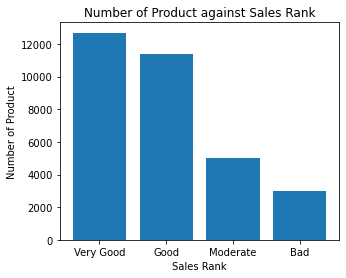

In [46]:
plt.figure(figsize = (5,4))
plt.bar(group_names, merged_review_table['rank-binned'].value_counts())
plt.title("Number of Product against Sales Rank")
plt.xlabel('Sales Rank')
plt.ylabel('Number of Product')

#### 4.5.2 Binning for Luxury Beauty Product

In [47]:
bins_luxuryBeauty = np.linspace(min(luxuryBeautyReview_table_withTime['rank']), max(luxuryBeautyReview_table_withTime['rank']), 5)
rank_names = ['Very Good', 'Good', 'Moderate', 'Bad']
luxuryBeautyReview_table_withTime['rank-binned'] = pd.cut(luxuryBeautyReview_table_withTime['rank'], bins_luxuryBeauty, labels=rank_names, include_lowest=True)
luxuryBeautyReview_table_withTime

asin     rank  average-rating  number-of-review  \
0      B00004U9V2     4324        4.616462               571   
1      B0000531EN  1633549        4.500000                 6   
2      B0000532JH  1806710        3.125000                 8   
3      B00005NDTD    42464        4.862500                80   
4      B00005R7ZZ  1527650        4.600000                 5   
...           ...      ...             ...               ...   
11808  B01HIQIEYC    88740        4.360000                25   
11809  B01HIQHQU0   122331        4.500000                14   
11810  B01HIQEOLO   168028        5.000000                11   
11811  B01HJ2UY0W   490755        1.000000                 1   
11812  B01HJ2UY1G   181383        5.000000                 1   

       average-verified-rating  time-weighted-overall rank-binned  
0                     4.629845               3.826292   Very Good  
1                     4.000000               1.597238         Bad  
2                     3.166667               1.353513         Bad  
3                     4.870130               3.929132   Very Good  
4                     4.333333               2.233371    Moderate  
...                        ...                    ...         ...  
11808                 4.333333               3.960769   Very Good  
11809                 4.500000               4.143724   Very Good  
11810                 5.000000               4.534256   Very Good  
11811                 1.000000               0.876260   Very Good  
11812                 5.000000               4.418626   Very Good  

[11813 rows x 7 columns]

## 5.0 Data Analysis
****Important Note:****
All beauty productis our main dataset. This project is mainly analysing all beauty product dataset. Luxury beauty product is mainly used for predictive modelling section.

### 5.1 Corr: avg rating && sales rank

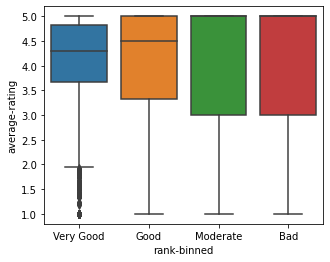

In [48]:
plt.figure(figsize = (5,4))
bp = sns.boxplot(x='rank-binned', y='average-rating', data=merged_review_table)

[Text(0.5, 0, 'Average Rating of Beauty Product'),
 Text(0, 0.5, 'Sales Rank'),
 Text(0.5, 1.0, 'Average Rating of Beauty Products against Sales Rank')]

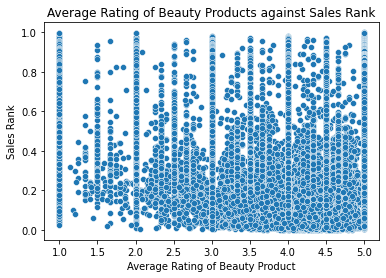

In [49]:
average_v_rank = sns.scatterplot(x='average-rating', 
                                 y='rank',
                                 data=merged_review_table)

average_v_rank.set(xlabel='Average Rating of Beauty Product', 
                   ylabel='Sales Rank', 
                   title="Average Rating of Beauty Products against Sales Rank")

<AxesSubplot:xlabel='average-rating', ylabel='rank'>

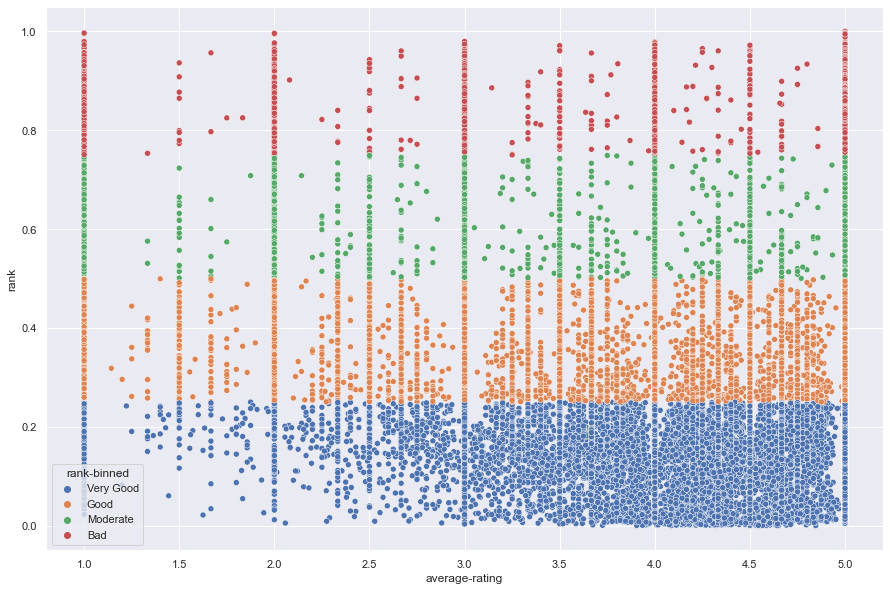

In [50]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='average-rating', y='rank', data = merged_review_table, hue='rank-binned')

In [51]:
num_review_am200 = merged_review_table.copy()
num_review_am200 = num_review_am200[num_review_am200['number-of-review']<= 200]


num_review_am200['average-rating-range'] = pd.cut(num_review_am200['average-rating'],
                                                  [0, 3, 4,6], 
                                                  right=False,
                                                  labels=["[1, 3)","[3, 4)","[4, 5]"])
num_review_am200

asin      rank  average-rating  number-of-review rank-binned  \
0      6546546450  0.844068             2.5                 2         Bad   
1      7178680776  0.250716             3.0                 1        Good   
2      7250468162  0.274799             5.0                 1        Good   
3      7367905066  0.537208             5.0                 1    Moderate   
4      7414204790  0.019446             4.4                15   Very Good   
...           ...       ...             ...               ...         ...   
32480  B01HIWLLUK  0.616217             5.0                 1    Moderate   
32481  B01HJ1K3YK  0.470987             1.0                 1        Good   
32482  B01HJ84SGM  0.059576             5.0                 5   Very Good   
32483  B01HJASD20  0.277377             1.0                 1        Good   
32484  B01HJEGTYK  0.137335             3.0                10   Very Good   

      average-rating-range  
0                   [1, 3)  
1                   [3, 4)  
2                   [4, 5]  
3                   [4, 5]  
4                   [4, 5]  
...                    ...  
32480               [4, 5]  
32481               [1, 3)  
32482               [4, 5]  
32483               [1, 3)  
32484               [3, 4)  

[31857 rows x 6 columns]

Unlike `merged_review_table`, the `num_review_am200` only contains product that has at most 200 reviews.



In [52]:
#Finding correlation for 3 different categories of rating
low_rating = num_review_am200['average-rating-range'] == "[1, 3)"
mod_rating = num_review_am200['average-rating-range'] == "[3, 4)"
high_rating = num_review_am200['average-rating-range'] == "[4, 5]"

low_rating_table = num_review_am200[low_rating]
mod_rating_table = num_review_am200[mod_rating]
high_rating_table = num_review_am200[high_rating]
print(high_rating_table['average-rating'].corr(high_rating_table['rank']),"\n")
print(mod_rating_table['average-rating'].corr(mod_rating_table['rank']),"\n")
print(low_rating_table['average-rating'].corr(low_rating_table['rank']))

0.19258599024477108 

-0.4334039295627051 

-0.3834335522148033


<AxesSubplot:xlabel='average-rating', ylabel='rank'>

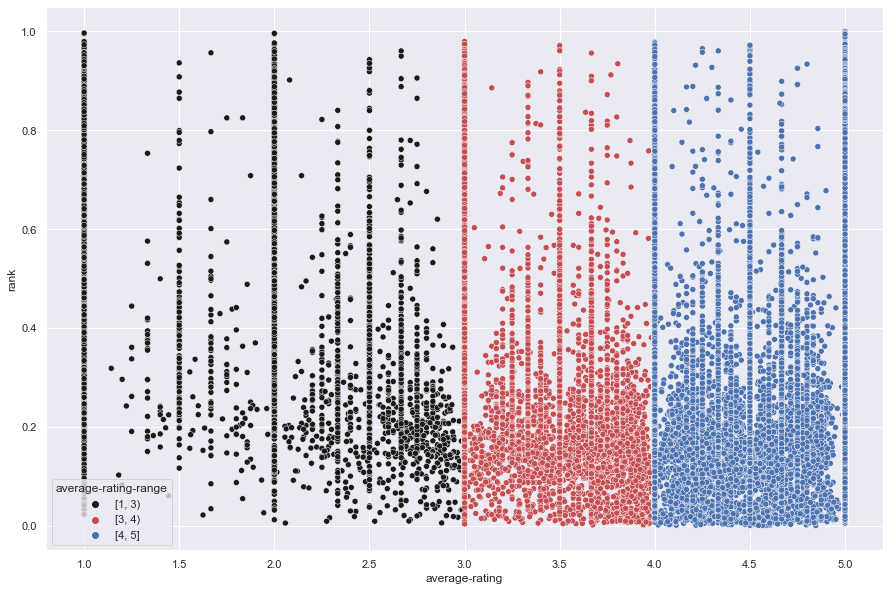

In [53]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='average-rating', y='rank', data=num_review_am200, hue='average-rating-range', palette=["k", "C3","C0"])

<AxesSubplot:xlabel='number-of-review', ylabel='rank'>

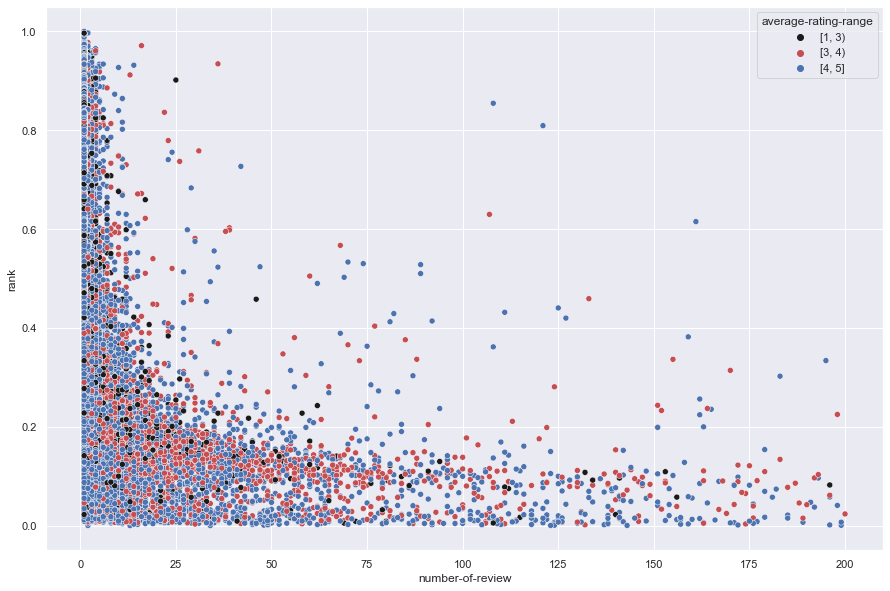

In [54]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='number-of-review', y='rank', data=num_review_am200, hue='average-rating-range', palette=["k", "C3","C0"])

<AxesSubplot:xlabel='number-of-review', ylabel='rank'>

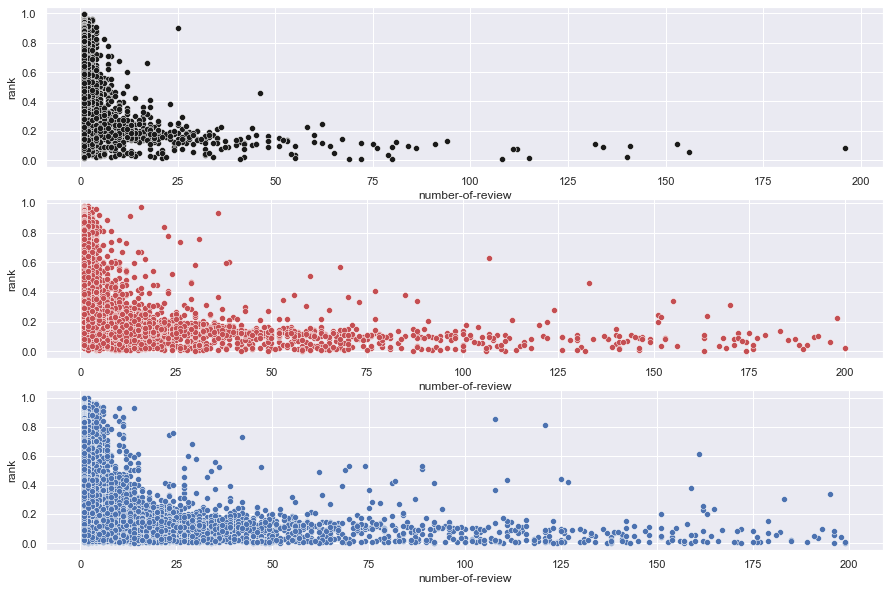

In [55]:
plt.subplot(3, 1, 1)
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='number-of-review', y='rank', data=low_rating_table, color="k")

plt.subplot(3, 1, 2)
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='number-of-review', y='rank', data=mod_rating_table, color="C3")

plt.subplot(3, 1, 3)
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='number-of-review', y='rank', data=high_rating_table, color="C0")

### 5.2 Corr: num review && sales rank

In [56]:
num_review = merged_review_table[['asin','number-of-review', 'rank']]
num_review = num_review.sort_values(by=['rank'])
num_review

asin  number-of-review      rank
8135   B00BXPVIT8                13  0.000010
5863   B006IB5T4W              2790  0.000019
11623  B00HYEPVG8                34  0.000070
3201   B001QY8QXM              4543  0.000080
77     B00005JS5C              2249  0.000131
...           ...               ...       ...
18734  B00TBTBJLA                 1  0.995547
23707  B015X6LH8E                 1  0.996050
31228  B01FWLYTG2                 1  0.996580
3019   B001LNW3ZK                 2  0.996847
2948   B001JYXGC0                 1  1.000000

[32083 rows x 3 columns]

In [57]:
num_review.corr()

number-of-review      rank
number-of-review          1.000000 -0.120137
rank                     -0.120137  1.000000

In [58]:
# sns.heatmap(num_review.corr(),cmap='jet')

In [59]:
# figure, axes = plt.subplots(1, 2)
# num_review.plot(ax=axes[0])
# sns.scatterplot(x="number-of-review", y="rank", data=num_review)

In [60]:
# plt.figure(figsize = (10,8))
# sns.regplot(x="number-of-review", y="rank", data=num_review)
# plt.ylim(0,)

#### 5.2.1 num review 4 bins

In [61]:
# filter out num_review that are too high (consider them as outlier)
num_review_filter = num_review[num_review['number-of-review']<200]
num_review_filter.shape

# 32083(total all) 
# 32029(<500) / 54 (>=500)
# 31856(<200) / 227 (>=200)
# 31540(<100) / 543 (>=100)

(31856, 3)

In [62]:
# square brackets '[]' mean the end point is included
# round parentheses '()' mean it's excluded
num_review_filter['num-review-range'] = pd.cut(num_review_filter['number-of-review'],
                                                  [0, 4, 7, 10, 200], 
                                                  right=True,
                                                  labels=['[1,4]', '(4,7]', '(7,10]', '(10,200)'])
num_review_filter

<ipython-input-62-04ff3667af66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_review_filter['num-review-range'] = pd.cut(num_review_filter['number-of-review'],


asin  number-of-review      rank num-review-range
8135   B00BXPVIT8                13  0.000010         (10,200)
11623  B00HYEPVG8                34  0.000070         (10,200)
8137   B00BXR0SFG                 2  0.000245            [1,4]
29417  B01DJI7796               123  0.000292         (10,200)
28053  B01C39X6TW               143  0.000313         (10,200)
...           ...               ...       ...              ...
18734  B00TBTBJLA                 1  0.995547            [1,4]
23707  B015X6LH8E                 1  0.996050            [1,4]
31228  B01FWLYTG2                 1  0.996580            [1,4]
3019   B001LNW3ZK                 2  0.996847            [1,4]
2948   B001JYXGC0                 1  1.000000            [1,4]

[31856 rows x 4 columns]

In [63]:
num_review_filter['num-review-range'].value_counts().sort_index

<bound method Series.sort_index of [1,4]       23318
(10,200)     4273
(4,7]        2818
(7,10]       1447
Name: num-review-range, dtype: int64>

[Text(0.5, 0, 'Total Number of Reviews'),
 Text(0, 0.5, 'Sales Rank'),
 Text(0.5, 1.0, 'Total Number of Reviews against Sales Rank')]

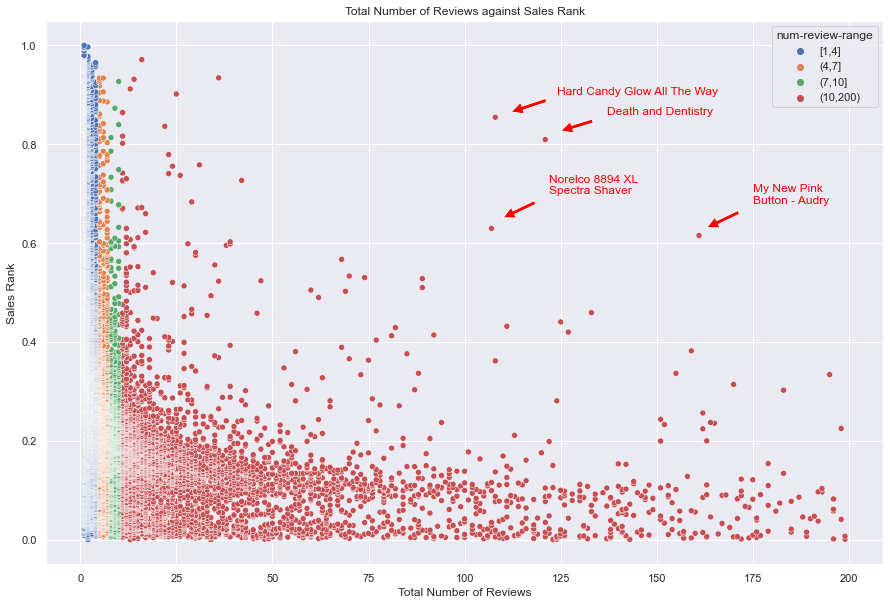

In [64]:
sns.set(rc={'figure.figsize':(15,10)})
sttrplt=sns.scatterplot(x='number-of-review', y='rank', data = num_review_filter, hue='num-review-range')
plt.annotate(
# Label and coordinate
'Hard Candy Glow All The Way', xy=(110,0.86), xytext=(124, 0.9), color= "red", arrowprops={"facecolor": 'red', "shrink": 0.15}
)
plt.annotate(
# Label and coordinate
'Death and Dentistry', xy=(122,0.82), xytext=(137, 0.86), color= "red", arrowprops={"facecolor": 'red', "shrink": 0.20}
)
plt.annotate(
# Label and coordinate
'Norelco 8894 XL \nSpectra Shaver', xy=(107,0.64), xytext=(122, 0.70), color= "red", arrowprops={"facecolor": 'red', "shrink": 0.20}
)
plt.annotate(
# Label and coordinate
'My New Pink \nButton - Audry', xy=(160,0.62), xytext=(175, 0.68), color= "red", arrowprops={"facecolor": 'red', "shrink": 0.20}
)

sttrplt.set(xlabel='Total Number of Reviews', 
            ylabel='Sales Rank', 
            title="Total Number of Reviews against Sales Rank")


In [65]:
num_review_filter[num_review_filter['number-of-review'] <=50].corr()

number-of-review      rank
number-of-review          1.000000 -0.419714
rank                     -0.419714  1.000000

#### 5.2.2 num of high/low rating

In [66]:
rating_grouping = final_review_table[['asin', 'overall']]

# count by number of high rating reviews
high_review_count = rating_grouping.groupby(['asin'])['overall'].apply(lambda x: (x >= 4).sum())
high_review_count = pd.DataFrame(high_review_count)
high_review_count.rename(columns={'overall':'number-of-high-rating-review'},inplace=True)
high_review_count.reset_index(inplace = True)

# count by number of low rating reviews
low_review_count = rating_grouping.groupby(['asin'])['overall'].apply(lambda x: (x < 4).sum())
low_review_count = pd.DataFrame(low_review_count)
low_review_count.rename(columns={'overall':'number-of-low-rating-review'},inplace=True)
low_review_count.reset_index(inplace = True)

In [67]:
# m is a updated version of merged_review_table, with column recording the number of high & low rating reviews of each products
m = (pd.merge(high_review_count, low_review_count, on='asin', how='inner', indicator=True)).set_index('asin')
m.reset_index(inplace=True)
m = m.drop(['_merge'],axis = 1)
m

m = (pd.merge(merged_review_table, m, on='asin', how='inner', indicator=True)).set_index('asin')
m.reset_index(inplace=True)
m = m.drop(['_merge'],axis = 1)
m


asin      rank  average-rating  number-of-review rank-binned  \
0      6546546450  0.844068             2.5                 2         Bad   
1      7178680776  0.250716             3.0                 1        Good   
2      7250468162  0.274799             5.0                 1        Good   
3      7367905066  0.537208             5.0                 1    Moderate   
4      7414204790  0.019446             4.4                15   Very Good   
...           ...       ...             ...               ...         ...   
32078  B01HIWLLUK  0.616217             5.0                 1    Moderate   
32079  B01HJ1K3YK  0.470987             1.0                 1        Good   
32080  B01HJ84SGM  0.059576             5.0                 5   Very Good   
32081  B01HJASD20  0.277377             1.0                 1        Good   
32082  B01HJEGTYK  0.137335             3.0                10   Very Good   

       number-of-high-rating-review  number-of-low-rating-review  
0                                 1                            1  
1                                 0                            1  
2                                 1                            0  
3                                 1                            0  
4                                13                            2  
...                             ...                          ...  
32078                             1                            0  
32079                             0                            1  
32080                             5                            0  
32081                             0                            1  
32082                             4                            6  

[32083 rows x 7 columns]

In [68]:
filter_num_review_50 = m['number-of-review'] <=50
m = m[filter_num_review_50]
m[['number-of-review','rank']].corr()

number-of-review      rank
number-of-review          1.000000 -0.419714
rank                     -0.419714  1.000000

[Text(0.5, 1.0, 'Number of Reviews(<=50) against Sales Rank')]

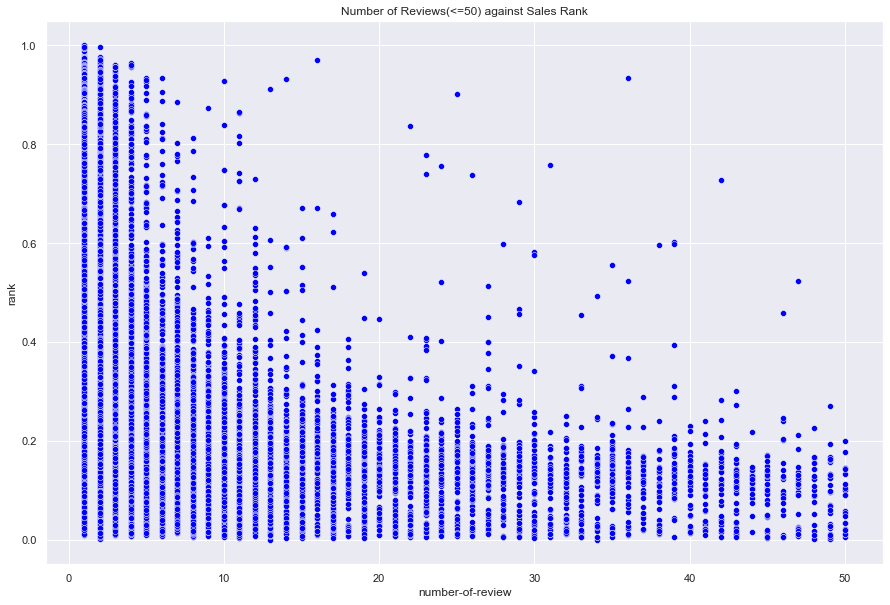

In [69]:
nReview50 = sns.scatterplot(x="number-of-review", y="rank", data=m,color="blue")
nReview50.set(title="Number of Reviews(<=50) against Sales Rank")

<AxesSubplot:xlabel='number-of-low-rating-review', ylabel='rank'>

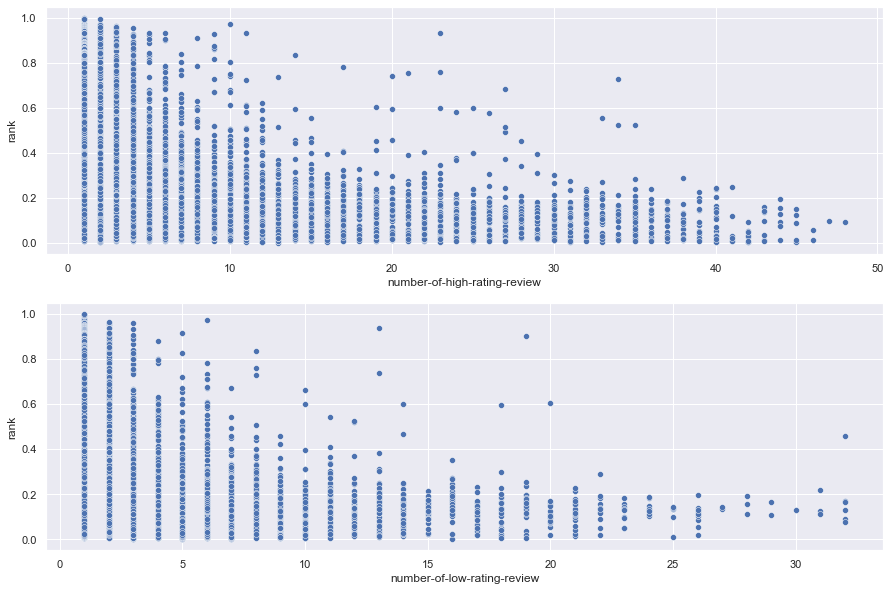

In [70]:
# ploting a graph to see the relationship between number of high rating reviews (those that are >= 4), and the sales rank
plt.subplot(2, 1, 1)
# getting those products that have at least one high rating review
m1 = m[m['number-of-high-rating-review'] > 0]
# we have 27858 products here
sns.scatterplot(x="number-of-high-rating-review", y="rank", data=m1)


# ploting a graph to see the relationship between number of low rating reviews (those that are < 4), and the sales rank
plt.subplot(2, 1, 2)
# getting those products that have at least one low rating review
m2 = m[m['number-of-low-rating-review'] > 0]
# we have 15950 products here
sns.scatterplot(x="number-of-low-rating-review", y="rank", data=m2)

#### 5.2.3 correlation at different year (2000-2018)

In [71]:
# filter final_review_table, groupby asin and year
p_AvgRating_ByYear = final_review_table.groupby(['asin','year'], sort=True)['overall'].agg(['mean', 'count'])
p_AvgRating_ByYear = pd.DataFrame(p_AvgRating_ByYear)
p_AvgRating_ByYear.reset_index(level=['asin','year'], inplace=True)

# filter merged_review_table
p_rank = merged_review_table[['asin', 'rank']]

# merge both average rating and rank
avgRating_byYear = (pd.merge(p_rank, p_AvgRating_ByYear, on='asin', how='inner', indicator=True))
avgRating_byYear.drop(['_merge'], axis=1, inplace =True)
avgRating_byYear = avgRating_byYear.astype({'year': 'int'})
avgRating_byYear.sort_values(by=['year'], inplace=True)
avgRating_byYear = avgRating_byYear[['year','asin','rank','count','mean']]

avgRating_byYear

year        asin      rank  count  mean
43     2000  B000050B60  0.868033      1   5.0
46     2000  B000050B69  0.880707      3   5.0
48     2000  B000050B62  0.965073      1   5.0
94     2000  B000050FED  0.901629      1   3.0
80     2000  B000050B64  0.925721      1   5.0
...     ...         ...       ...    ...   ...
2214   2018  B000B658RI  0.192526      1   5.0
46770  2018  B013XFYYD2  0.115749      2   4.0
46776  2018  B013XJET9M  0.149915      1   2.0
46710  2018  B013V9RQEE  0.245075      1   5.0
62405  2018  B01HJEGTYK  0.137335      1   2.0

[62406 rows x 5 columns]

In [72]:
# sort table according to rank, and reindex the rank
sorted_avgRating_byYear = avgRating_byYear.sort_values(by='rank')
sorted_avgRating_byYear.reset_index(drop=True,inplace=True)
sorted_avgRating_byYear['nrank'] = sorted_avgRating_byYear.index+1
sorted_avgRating_byYear

year        asin      rank  count      mean  nrank
0      2017  B00BXPVIT8  0.000010      3  4.666667      1
1      2018  B00BXPVIT8  0.000010      3  5.000000      2
2      2014  B00BXPVIT8  0.000010      2  4.500000      3
3      2016  B00BXPVIT8  0.000010      4  5.000000      4
4      2015  B00BXPVIT8  0.000010      1  5.000000      5
...     ...         ...       ...    ...       ...    ...
62401  2016  B015X6LH8E  0.996050      1  2.000000  62402
62402  2016  B01FWLYTG2  0.996580      1  1.000000  62403
62403  2008  B001LNW3ZK  0.996847      1  5.000000  62404
62404  2014  B001LNW3ZK  0.996847      1  5.000000  62405
62405  2009  B001JYXGC0  1.000000      1  5.000000  62406

[62406 rows x 6 columns]

In [73]:
frame_list =[]
density_list = []
date_list = []
for x in range(2000, 2019):
    tempPd = filterByYear(x, sorted_avgRating_byYear)
    density = calculateDensity(tempPd['count'], tempPd['nrank'])
    tempPd = pd.DataFrame(tempPd)
    frame_list.append(tempPd)
    density_list.append(density)
    date_list.append(str(x))

In [74]:
#########
# If you're using Jupyter notebook
# Use this command to switch on matplotlib's backend, this will enable interactive UI

# %matplotlib notebook 

##########
# After running the animated gif
# use this command to switch off matplotlib's backend, this will disable interactive UI

# %matplotlib inline

#########
# To learn more about matplotlib
# %matplotlib --list

Animation of sales rank (y_axis) against number of reviews (x_axis) from 2000 to 2018 in every year 

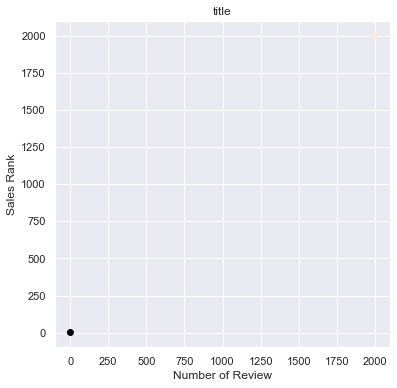

In [75]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter([1,2000], [1,2000], c=[1,2000])
ax.set_title("title")
plt.xlabel("Number of Review")
plt.ylabel("Sales Rank")

#not in use (may omit)
def init():
    sc = ax.set_data([], [])
    return sc,

def animate(i):
    ax.scatter(frame_list[i]['count'], frame_list[i]['rank'], c=density_list[i], edgecolor='none')
    ax.set_title(date_list[i])
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=19, interval=1000)#, interval=100)

plt.show()     

### 5.3 Analysing "Very Good" Products

Further analysing product binned in "Very Good". These product ranking falls into the range 35 ~ 870386.75



In [76]:
vg_filter = merged_review_table['rank'] <= 870386.75
vg_table = merged_review_table[vg_filter]
vg_table.sort_values(by=['rank'])

asin      rank  average-rating  number-of-review rank-binned
8135   B00BXPVIT8  0.000010        4.846154                13   Very Good
5863   B006IB5T4W  0.000019        4.643369              2790   Very Good
11623  B00HYEPVG8  0.000070        4.588235                34   Very Good
3201   B001QY8QXM  0.000080        4.556020              4543   Very Good
77     B00005JS5C  0.000131        4.088039              2249   Very Good
...           ...       ...             ...               ...         ...
18734  B00TBTBJLA  0.995547        5.000000                 1         Bad
23707  B015X6LH8E  0.996050        2.000000                 1         Bad
31228  B01FWLYTG2  0.996580        1.000000                 1         Bad
3019   B001LNW3ZK  0.996847        5.000000                 2         Bad
2948   B001JYXGC0  1.000000        5.000000                 1         Bad

[32083 rows x 5 columns]

There are 11379 products that falls in the "Very Good" category, with the highest rank being 35, and the lowest rank is 870359.

We will further bin the products.

In [77]:
bins_2 = np.linspace(min(vg_table['rank']), max(vg_table['rank']), 5)
bins_2

array([1.00533055e-05, 2.50007540e-01, 5.00005027e-01, 7.50002513e-01,
       1.00000000e+00])

In [78]:
group_names_2 = ['1', '2', '3', '4']
vg_table['upper-rank-binned'] = pd.cut(vg_table['rank'], bins_2, labels=group_names_2, include_lowest=True)
vg_table.head()

asin      rank  average-rating  number-of-review rank-binned  \
0  6546546450  0.844068             2.5                 2         Bad   
1  7178680776  0.250716             3.0                 1        Good   
2  7250468162  0.274799             5.0                 1        Good   
3  7367905066  0.537208             5.0                 1    Moderate   
4  7414204790  0.019446             4.4                15   Very Good   

  upper-rank-binned  
0                 4  
1                 2  
2                 2  
3                 3  
4                 1

<BarContainer object of 4 artists>

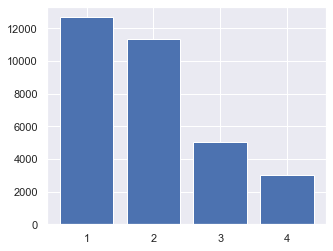

In [79]:
plt.figure(figsize = (5,4))
plt.bar(group_names_2, vg_table['upper-rank-binned'].value_counts())

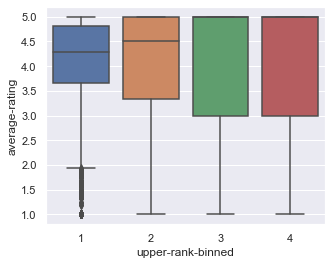

In [80]:
plt.figure(figsize = (5,4))
bp = sns.boxplot(x='upper-rank-binned', y='average-rating', data=vg_table)

In [81]:
vg_table.sort_values(by='average-rating')

asin      rank  average-rating  number-of-review rank-binned  \
11444  B00HNXZ5A2  0.641389             1.0                 1    Moderate   
2102   B0013NFY8G  0.342832             1.0                 3        Good   
24108  B016NLMDHW  0.231473             1.0                 1   Very Good   
5003   B004X2HNR4  0.944680             1.0                 1         Bad   
2109   B0013THRI0  0.770144             1.0                 1         Bad   
...           ...       ...             ...               ...         ...   
18196  B00S1KYWBE  0.459015             5.0                 1        Good   
18199  B00S1RKTS2  0.427705             5.0                 1        Good   
18202  B00S20MNDW  0.553129             5.0                 1    Moderate   
3489   B0028XO2TW  0.194477             5.0                 2   Very Good   
19427  B00USBJOQW  0.509694             5.0                 1    Moderate   

      upper-rank-binned  
11444                 3  
2102                  2  
24108                 1  
5003                  4  
2109                  4  
...                 ...  
18196                 2  
18199                 2  
18202                 3  
3489                  1  
19427                 3  

[32083 rows x 6 columns]

In [82]:
vg_table_lt200 = vg_table[vg_table['number-of-review']<200].copy() # cleared 214 products
vg_table_top = vg_table_lt200[vg_table['upper-rank-binned'] == '1'].copy()

vg_table_top['average-rating-range'] = pd.cut(vg_table_top['average-rating'],
                                                  [0, 4, 6], 
                                                  right=False,
                                                  labels=["[1, 4)", "[4, 5]"])
vg_table_top.head() 

<ipython-input-82-7069b338df98>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vg_table_top = vg_table_lt200[vg_table['upper-rank-binned'] == '1'].copy()


asin      rank  average-rating  number-of-review rank-binned  \
4   7414204790  0.019446        4.400000                15   Very Good   
5   7535842801  0.200870        4.000000                23   Very Good   
17  9742121109  0.122233        4.333333                 3   Very Good   
20  9790787006  0.085853        4.228070                57   Very Good   
26  B000050B6B  0.042678        4.441558               154   Very Good   

   upper-rank-binned average-rating-range  
4                  1               [4, 5]  
5                  1               [4, 5]  
17                 1               [4, 5]  
20                 1               [4, 5]  
26                 1               [4, 5]

<AxesSubplot:xlabel='average-rating', ylabel='rank'>

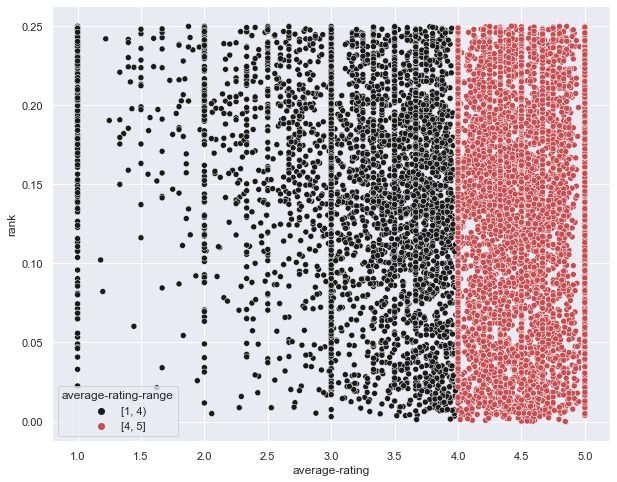

In [83]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x='average-rating', y='rank', data=vg_table_top, hue='average-rating-range', palette=["k", "C3"])

<AxesSubplot:xlabel='number-of-review', ylabel='rank'>

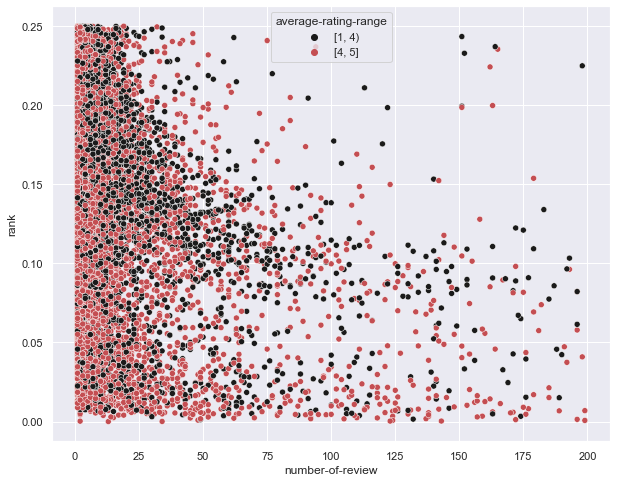

In [84]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x='number-of-review', y='rank', data=vg_table_top, hue='average-rating-range', palette=["k", "C3"])

### 5.4 Slice Sales Rank < 5000



In [85]:
#try to take data that have sales rank less than 50000
partial_table = merged_review_table[merged_review_table['rank'] <= 50000]

#min-max normalization
#partial_table['rank'] = (partial_table['rank'] - partial_table['rank'].min())/(partial_table['rank'].max()-partial_table['rank'].min())
partial_table

asin      rank  average-rating  number-of-review rank-binned
0      6546546450  0.844068             2.5                 2         Bad
1      7178680776  0.250716             3.0                 1        Good
2      7250468162  0.274799             5.0                 1        Good
3      7367905066  0.537208             5.0                 1    Moderate
4      7414204790  0.019446             4.4                15   Very Good
...           ...       ...             ...               ...         ...
32480  B01HIWLLUK  0.616217             5.0                 1    Moderate
32481  B01HJ1K3YK  0.470987             1.0                 1        Good
32482  B01HJ84SGM  0.059576             5.0                 5   Very Good
32483  B01HJASD20  0.277377             1.0                 1        Good
32484  B01HJEGTYK  0.137335             3.0                10   Very Good

[32083 rows x 5 columns]

In [86]:
partial_table.corr()

rank  average-rating  number-of-review
rank              1.000000       -0.062927         -0.120137
average-rating   -0.062927        1.000000          0.006235
number-of-review -0.120137        0.006235          1.000000

In [87]:
num_review = partial_table[['asin','number-of-review', 'rank']]
num_review = num_review.sort_values(by=['rank'])
num_review

asin  number-of-review      rank
8135   B00BXPVIT8                13  0.000010
5863   B006IB5T4W              2790  0.000019
11623  B00HYEPVG8                34  0.000070
3201   B001QY8QXM              4543  0.000080
77     B00005JS5C              2249  0.000131
...           ...               ...       ...
18734  B00TBTBJLA                 1  0.995547
23707  B015X6LH8E                 1  0.996050
31228  B01FWLYTG2                 1  0.996580
3019   B001LNW3ZK                 2  0.996847
2948   B001JYXGC0                 1  1.000000

[32083 rows x 3 columns]

<AxesSubplot:xlabel='number-of-review', ylabel='rank'>

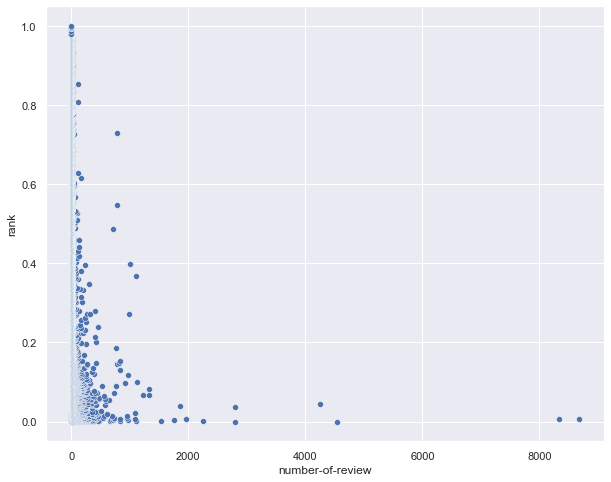

In [88]:
plt.figure(figsize = (10,8))
sns.scatterplot(x="number-of-review", y="rank", data=num_review)

[Text(0.5, 0, 'Average Rating of Beauty Product'),
 Text(0, 0.5, 'Sales Rank'),
 Text(0.5, 1.0, 'Average Rating of Beauty Products against Sales Rank')]

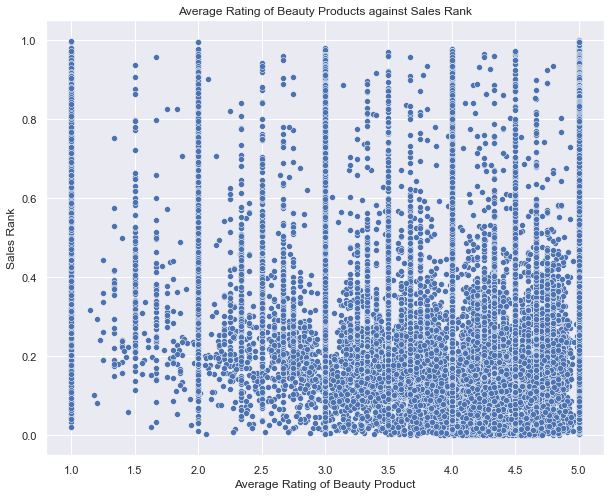

In [89]:
plt.figure(figsize = (10,8))
average_v_rank = sns.scatterplot(x='average-rating', 
                                 y='rank',
                                 data=partial_table)

average_v_rank.set(xlabel='Average Rating of Beauty Product', 
                   ylabel='Sales Rank', 
                   title="Average Rating of Beauty Products against Sales Rank")

### 5.5 Price VS Sales Rank

In [90]:
price_rank_table = product_table[['asin','rank','price']]
num_review_table = mv_review_table[['asin','number-of-review']]
# merge number of reviews
merged_price_table = (pd.merge(price_rank_table, num_review_table , on='asin', how='inner', indicator=True)).set_index('asin')
merged_price_table.reset_index(inplace = True)
merged_price_table = merged_price_table.drop(['_merge'],axis = 1)
merged_price_table.rename(columns={'overall':'number-of-review'},inplace=True)

# filter out product with 0 as sales rank 
#merged_price_table = merged_price_table[merged_price_table['rank'] > 0]
#merged_price_table = merged_price_table[merged_price_table['price'] > 0]

#remove outliers
price_z_scores = stats.zscore(pd.DataFrame(merged_price_table['price']))
price_abs_z_scores = np.abs(price_z_scores)
price_outlier = (price_abs_z_scores > 3).all(axis=1)
merged_price_table.drop(merged_price_table[price_outlier].index, inplace = True)
merged_price_table.sort_values(by=['rank']) 

asin      rank  price  number-of-review
7970   B00BXPVIT8  0.000010  21.44                13
5717   B006IB5T4W  0.000019  11.29              2790
11426  B00HYEPVG8  0.000070   9.59                34
3091   B001QY8QXM  0.000080   9.30              4543
68     B00005JS5C  0.000131  18.49              2249
...           ...       ...    ...               ...
18486  B00TBTBJLA  0.995547   0.00                 1
23407  B015X6LH8E  0.996050  50.60                 1
30844  B01FWLYTG2  0.996580   0.00                 1
2911   B001LNW3ZK  0.996847   0.00                 2
2840   B001JYXGC0  1.000000   0.00                 1

[31762 rows x 4 columns]

In [91]:
#min-max normalization
#price_rank_table['rank'] = (price_rank_table['rank'] - price_rank_table['rank'].min())/(price_rank_table['rank'].max()-price_rank_table['rank'].min())

In [92]:
filter_num_review = merged_price_table['number-of-review'] < 50
#filter_price = merged_price_table['price'] < 25
merged_price_table = merged_price_table[filter_num_review]
#merged_price_table = merged_price_table[filter_price]
merged_price_table.sort_values(by=['price'])

asin      rank   price  number-of-review
0      6546546450  0.844068    0.00                 2
19006  B00UD9TUJK  0.480224    0.00                 2
19004  B00UCY2CXC  0.818849    0.00                 1
19003  B00UCONP4W  0.282302    0.00                 2
19001  B00UCIXNJK  0.432142    0.00                 7
...           ...       ...     ...               ...
7140   B00AG3ZYJ8  0.682215  110.99                 1
7657   B00BGEZTUK  0.195148  111.52                 1
15928  B00NSCT3NW  0.513283  111.77                 1
2723   B001GA73DK  0.302759  112.00                 1
20140  B00XDCZT4E  0.606855  112.00                 1

[30644 rows x 4 columns]

In [93]:
merged_price_table.corr()

rank     price  number-of-review
rank              1.000000 -0.232641         -0.420948
price            -0.232641  1.000000          0.024136
number-of-review -0.420948  0.024136          1.000000

In [94]:
# square brackets '[]' mean the end point is included
# round parentheses '()' mean it's excluded
merged_price_table['price-range'] = pd.cut(merged_price_table['price'],
                                                  [-1, 25, 75, 125, 200], 
                                                  right=True,
                                                  labels=['[0,25]', '(25,75]', '(75,125]', '(125,200]'])
merged_price_table

asin      rank  price  number-of-review price-range
0      6546546450  0.844068   0.00                 2      [0,25]
1      7178680776  0.250716  44.99                 1     (25,75]
2      7250468162  0.274799  28.76                 1     (25,75]
3      7367905066  0.537208   0.00                 1      [0,25]
4      7414204790  0.019446  12.15                15      [0,25]
...           ...       ...    ...               ...         ...
32078  B01HIWLLUK  0.616217   9.95                 1      [0,25]
32079  B01HJ1K3YK  0.470987   0.00                 1      [0,25]
32080  B01HJ84SGM  0.059576  55.63                 5     (25,75]
32081  B01HJASD20  0.277377  12.99                 1      [0,25]
32082  B01HJEGTYK  0.137335   0.00                10      [0,25]

[30644 rows x 5 columns]

[Text(0.5, 0, 'Price of Beauty Product'),
 Text(0, 0.5, 'Sales Rank'),
 Text(0.5, 1.0, 'Price of Beauty Products against Sales Rank')]

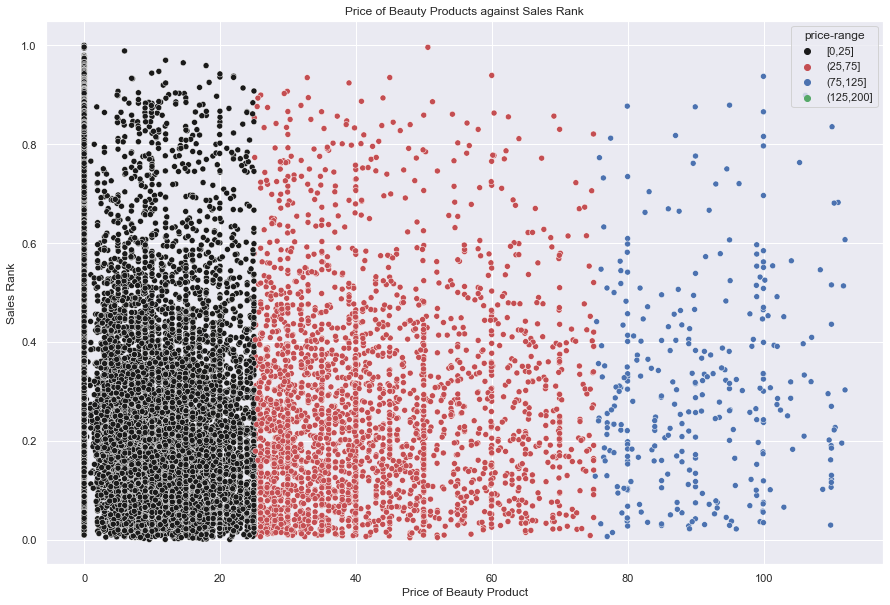

In [95]:
plt.figure(figsize = (15,10))
price_rank_graph = sns.scatterplot(x='price', 
                                 y='rank',
                                 data=merged_price_table, hue='price-range',palette=["k", "C3","C0","C2"])

price_rank_graph .set(xlabel='Price of Beauty Product', 
                   ylabel='Sales Rank', 
                   title="Price of Beauty Products against Sales Rank")

### 5.6 Analysing Review Upvotes

What 'vote' means? Check out
https://www.amazon.com/review/top-reviewer-faq.html

Summary: if people found your review helpful, they can give you a vote, if people found your review no helpful and decide to downvote you, your vote will get substracted

The vote score of each available product is calculated from all reviews given to it. From all of these reviews, only those with at least one vote are selected and applied weighted average to them.

Vote score formula: $$W=\frac {\sum_{i=1}^{n} w_i X_i} {\sum_{i=1}^{n} w_i}$$

$W$: weight average of the score (vote score)

$n$:	number of reviews to be averaged

$w_i$:	number of votes per review

$X_i$:	rating of the review



In [96]:
# suitable for passing merged_review_table or mv_review_table
def calculateVoteScore(rev_table):
    
    g = final_review_table[['asin', 'overall', 'vote']].groupby(['asin']).apply(lambda x: (x['overall']*x['vote']).sum()/x['vote'].sum() if x['vote'].sum()!= 0 else 0)
    vote_score = pd.DataFrame(g, columns=['vote-score'])
    vote_score.reset_index(inplace=True)
    vote_score
    
    rev_table = (pd.merge(rev_table, vote_score, on='asin', how='inner', indicator=True)).set_index('asin')
    rev_table.reset_index(inplace = True)
    rev_table = rev_table.drop(['_merge'],axis = 1)
    # rev_table.rename(columns={'overall':'number-of-review'},inplace=True)

    return rev_table

In [97]:
mv_review_table = calculateVoteScore(mv_review_table)


In [98]:
new_mv_review_table = mv_review_table[mv_review_table['vote-score']>0]
new_mv_review_table

asin      rank  average-rating  number-of-review  \
0      6546546450  0.844068        2.500000                 2   
4      7414204790  0.019446        4.400000                15   
5      7535842801  0.200870        4.000000                23   
19     9752980953  0.667839        1.000000                 1   
20     9790787006  0.085853        4.228070                57   
...           ...       ...             ...               ...   
32067  B01HI74BV6  0.102599        4.750000                 4   
32075  B01HIPOQ2M  0.059379        3.878049                41   
32077  B01HIWKGOM  0.087421        5.000000                 1   
32081  B01HJASD20  0.277377        1.000000                 1   
32082  B01HJEGTYK  0.137335        3.000000                10   

       average-verified-rating  vote-score  
0                     4.000000    1.000000  
4                     4.461538    4.000000  
5                     4.000000    3.181818  
19                    1.000000    1.000000  
20                    4.116279    5.000000  
...                        ...         ...  
32067                 4.750000    4.555556  
32075                 3.850000    3.809524  
32077                 5.000000    5.000000  
32081                 1.000000    1.000000  
32082                 3.000000    4.809524  

[8249 rows x 6 columns]

In [99]:
corr_test = mv_review_table[['rank', 'average-rating', 'number-of-review', 'average-verified-rating', 'vote-score']].corr()
corr_test

rank  average-rating  number-of-review  \
rank                     1.000000       -0.062927         -0.120137   
average-rating          -0.062927        1.000000          0.006235   
number-of-review        -0.120137        0.006235          1.000000   
average-verified-rating -0.193682        0.739772          0.019952   
vote-score              -0.351145        0.041226          0.149323   

                         average-verified-rating  vote-score  
rank                                   -0.193682   -0.351145  
average-rating                          0.739772    0.041226  
number-of-review                        0.019952    0.149323  
average-verified-rating                 1.000000    0.056967  
vote-score                              0.056967    1.000000

<AxesSubplot:>

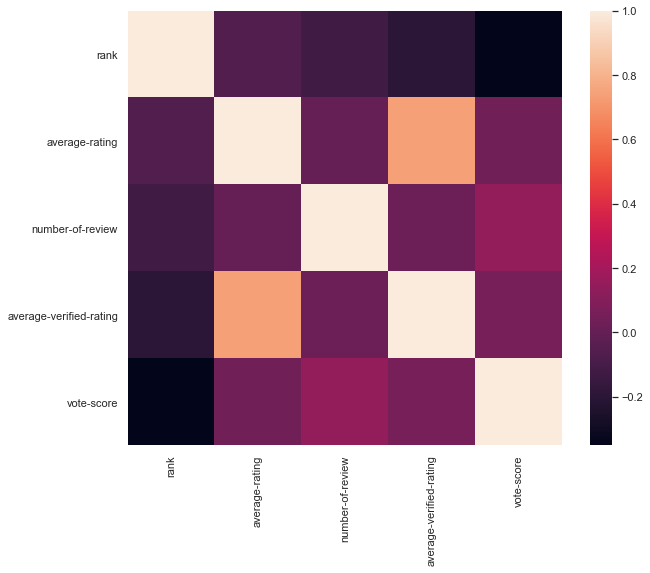

In [100]:
sns.heatmap(corr_test,square=True)

### 5.7 Analysing Time-Weighted-Average

In [101]:
from sklearn.preprocessing import MinMaxScaler 

# suitable for passing merged_review_table or mv_review_table
def CalculateTimeWeightedAvg(rev_table):

    frt_copy = final_review_table.copy()
    mmScaler = MinMaxScaler()
    frt_copy[['unixReviewTime']] = mmScaler.fit_transform(frt_copy[['unixReviewTime']])
    frt_copy['time-weighted-overall'] = frt_copy['overall'] * frt_copy['unixReviewTime'] 
    
    g = frt_copy[['asin', 'time-weighted-overall']]
    g = g.groupby(['asin'])['time-weighted-overall'].mean()
    time_score = pd.DataFrame(g)#, columns=['time-weighted-avg'])
    time_score.reset_index(inplace=True)
    
    rev_table = (pd.merge(rev_table, time_score, on='asin', how='inner', indicator=True)).set_index('asin')
    rev_table.reset_index(inplace = True)
    rev_table = rev_table.drop(['_merge'],axis = 1)

    return rev_table

In [102]:
new_mv_review_table_withTime = CalculateTimeWeightedAvg(mv_review_table)
new_mv_review_table_withTime

asin      rank  average-rating  number-of-review  \
0      6546546450  0.844068             2.5                 2   
1      7178680776  0.250716             3.0                 1   
2      7250468162  0.274799             5.0                 1   
3      7367905066  0.537208             5.0                 1   
4      7414204790  0.019446             4.4                15   
...           ...       ...             ...               ...   
32078  B01HIWLLUK  0.616217             5.0                 1   
32079  B01HJ1K3YK  0.470987             1.0                 1   
32080  B01HJ84SGM  0.059576             5.0                 5   
32081  B01HJASD20  0.277377             1.0                 1   
32082  B01HJEGTYK  0.137335             3.0                10   

       average-verified-rating  vote-score  time-weighted-overall  
0                     4.000000    1.000000               1.657095  
1                     3.000000    0.000000               2.834581  
2                     5.000000    0.000000               4.692989  
3                     5.000000    0.000000               4.589125  
4                     4.461538    4.000000               3.831831  
...                        ...         ...                    ...  
32078                 5.000000    0.000000               4.436383  
32079                 1.000000    0.000000               0.919200  
32080                 5.000000    0.000000               4.700168  
32081                 1.000000    1.000000               0.883611  
32082                 3.000000    4.809524               2.787781  

[32083 rows x 7 columns]

### 5.8 Bivariate Attribute Analysis

#### 5.8.1 Sales Rank

[Text(0.5, 1.0, 'The Sales Rank of Beauty Products'),
 Text(0.5, 0, 'Sales Rank')]

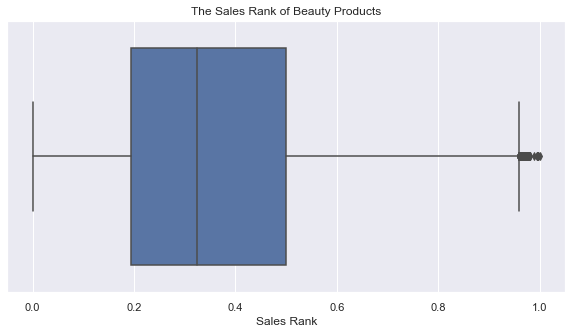

In [103]:
sns.set(rc={'figure.figsize':(10,5)})
bp = sns.boxplot(x=mv_review_table["rank"])
bp.set(title='The Sales Rank of Beauty Products',
       xlabel='Sales Rank')

#### 5.8.2 Average Rating

[Text(0.5, 1.0, 'The Average Rating of Beauty Products'),
 Text(0.5, 0, 'Average Rating')]

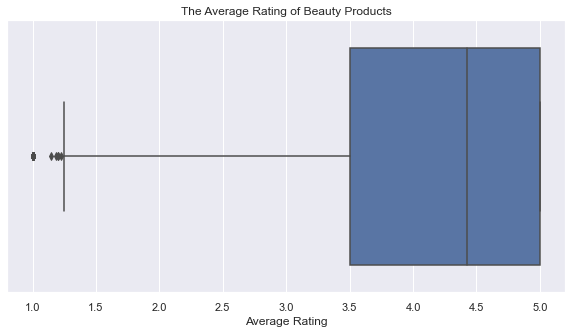

In [104]:
sns.set(rc={'figure.figsize':(10,5)})
bp = sns.boxplot(x=mv_review_table["average-rating"])
bp.set(title='The Average Rating of Beauty Products',
       xlabel='Average Rating')

#### 5.8.3 Average Verified Rating

[Text(0.5, 1.0, 'The Average Verified Rating of Beauty Products'),
 Text(0.5, 0, 'Average Verified Rating')]

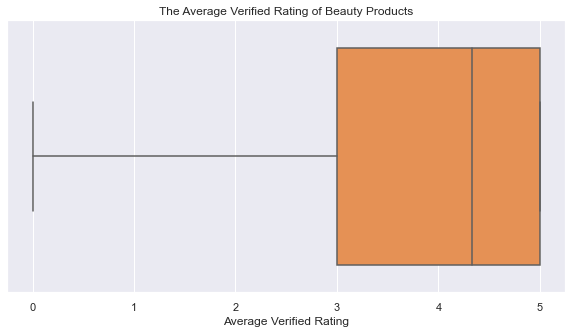

In [105]:
sns.set(rc={'figure.figsize':(10,5)})
bp = sns.boxplot(x=mv_review_table["average-verified-rating"], palette="Oranges_r")
bp.set(title='The Average Verified Rating of Beauty Products',
       xlabel='Average Verified Rating')

Comparing Average Rating and Average Verified Rating

In [106]:
mv_review_table_combine=pd.melt(mv_review_table[['average-rating', 'average-verified-rating']])

[Text(0.5, 1.0, 'Comparison Between Average Rating and Average Verified Rating'),
 Text(0.5, 0, 'Types of Rating'),
 Text(0, 0.5, 'Value')]

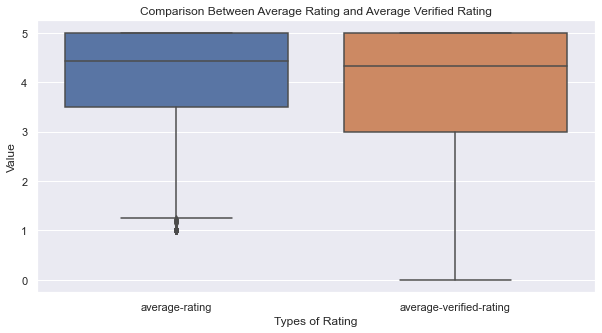

In [107]:
cbp=sns.boxplot(x="variable", y="value", data=mv_review_table_combine)
cbp.set(title='Comparison Between Average Rating and Average Verified Rating',
        xlabel='Types of Rating',
        ylabel='Value')

#### 5.8.4 Number of Reviews

[Text(0.5, 1.0, 'The Number of Reviews of Beauty Products'),
 Text(0.5, 0, 'Number of Reviews')]

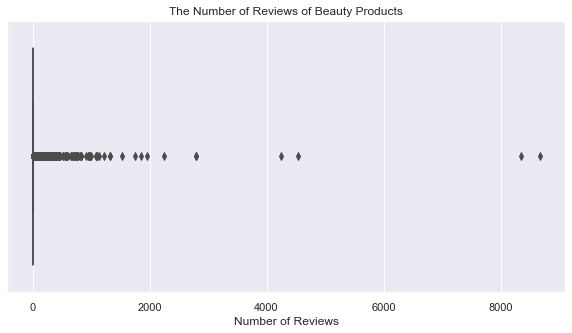

In [108]:
sns.set(rc={'figure.figsize':(10,5)})
bp = sns.boxplot(x=mv_review_table["number-of-review"])
bp.set(title='The Number of Reviews of Beauty Products',
       xlabel='Number of Reviews')

#### 5.8.5 Vote Score 

[Text(0.5, 1.0, 'The Vote Weighted Rating of Beauty Products'),
 Text(0.5, 0, 'Vote Weighted Rating')]

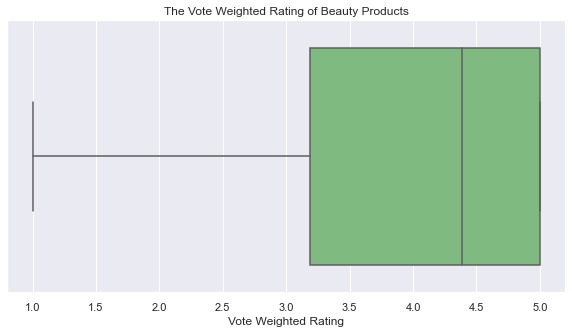

In [109]:
sns.set(rc={'figure.figsize':(10,5)})
bp = sns.boxplot(x=new_mv_review_table["vote-score"], palette="Greens_r")
bp.set(title='The Vote Weighted Rating of Beauty Products',
       xlabel='Vote Weighted Rating')

#### 5.8.6 Time Weighted Overall 

[Text(0.5, 1.0, 'The Time Weighted Rating of Beauty Products'),
 Text(0.5, 0, 'Time Weighted Rating')]

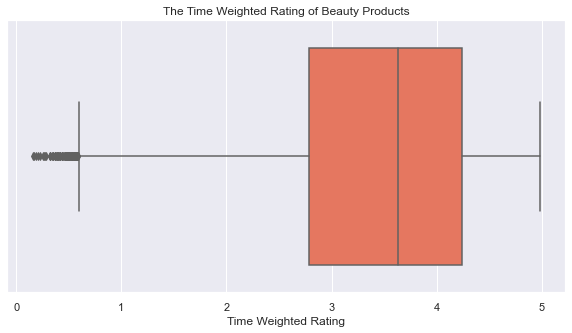

In [110]:
sns.set(rc={'figure.figsize':(10,5)})
bp = sns.boxplot(x=new_mv_review_table_withTime["time-weighted-overall"], palette="Reds")
bp.set(title='The Time Weighted Rating of Beauty Products',
       xlabel='Time Weighted Rating')

In [111]:
combined_rating=pd.melt(new_mv_review_table_withTime[['average-rating','average-verified-rating','vote-score','time-weighted-overall']])

[Text(0.5, 1.0, 'Comparison Between Average Rating and Time Weighted Rating'),
 Text(0.5, 0, 'Types of Rating'),
 Text(0, 0.5, 'Rating')]

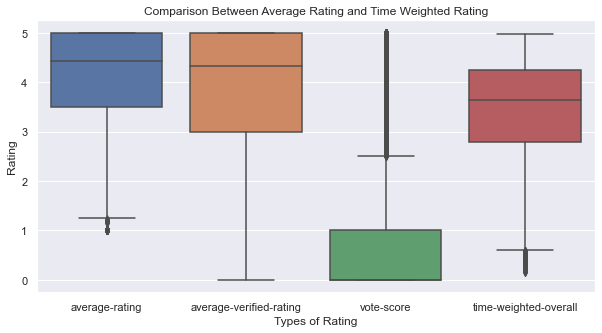

In [112]:
cbp=sns.boxplot(x="variable", y="value", data=combined_rating)
cbp.set(title='Comparison Between Average Rating and Time Weighted Rating',
        xlabel='Types of Rating',
        ylabel='Rating')

#### 5.8.7 Price 

[Text(0.5, 1.0, 'The Price of Beauty Products'), Text(0.5, 0, 'Price')]

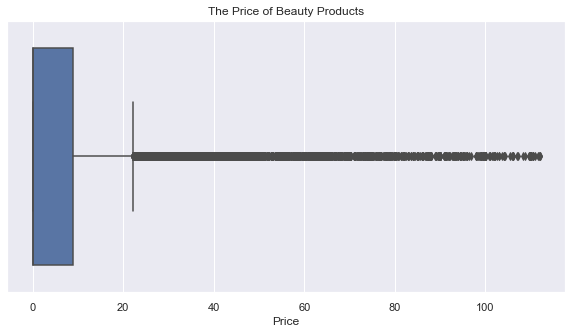

In [113]:
sns.set(rc={'figure.figsize':(10,5)})
bp = sns.boxplot(x=merged_price_table["price"])
bp.set(title='The Price of Beauty Products',
       xlabel='Price')

### 5.9 Correlation of All Attributes

In [114]:
#preparing required table
partial_product_table = product_table[['asin','price']]

##Merging Price with new_mv_review_table_withTime
final_review_price_table = (pd.merge(new_mv_review_table_withTime, partial_product_table, on='asin', how='inner', indicator=True)).set_index('asin')
final_review_price_table.reset_index(inplace = True)
final_review_price_table = final_review_price_table .drop(['_merge'],axis = 1)
final_review_price_table

asin      rank  average-rating  number-of-review  \
0      6546546450  0.844068             2.5                 2   
1      7178680776  0.250716             3.0                 1   
2      7250468162  0.274799             5.0                 1   
3      7367905066  0.537208             5.0                 1   
4      7414204790  0.019446             4.4                15   
...           ...       ...             ...               ...   
32078  B01HIWLLUK  0.616217             5.0                 1   
32079  B01HJ1K3YK  0.470987             1.0                 1   
32080  B01HJ84SGM  0.059576             5.0                 5   
32081  B01HJASD20  0.277377             1.0                 1   
32082  B01HJEGTYK  0.137335             3.0                10   

       average-verified-rating  vote-score  time-weighted-overall  price  
0                     4.000000    1.000000               1.657095   0.00  
1                     3.000000    0.000000               2.834581  44.99  
2                     5.000000    0.000000               4.692989  28.76  
3                     5.000000    0.000000               4.589125   0.00  
4                     4.461538    4.000000               3.831831  12.15  
...                        ...         ...                    ...    ...  
32078                 5.000000    0.000000               4.436383   9.95  
32079                 1.000000    0.000000               0.919200   0.00  
32080                 5.000000    0.000000               4.700168  55.63  
32081                 1.000000    1.000000               0.883611  12.99  
32082                 3.000000    4.809524               2.787781   0.00  

[32083 rows x 8 columns]

In [115]:
final_review_price_table.describe()

rank  average-rating  number-of-review  \
count  32083.000000    32083.000000      32083.000000   
mean       0.367673        4.039871         11.007107   
std        0.231363        1.142294         91.980093   
min        0.000010        1.000000          1.000000   
25%        0.194328        3.500000          1.000000   
50%        0.324216        4.428571          2.000000   
75%        0.499864        5.000000          5.000000   
max        1.000000        5.000000       8671.000000   

       average-verified-rating    vote-score  time-weighted-overall  \
count             32083.000000  32083.000000           32083.000000   
mean                  3.825636      1.010553               3.397758   
std                   1.433336      1.833135               1.062432   
min                   0.000000      0.000000               0.156530   
25%                   3.000000      0.000000               2.782916   
50%                   4.333333      0.000000               3.634031   
75%                   5.000000      1.000000               4.244692   
max                   5.000000      5.000000               4.981671   

              price  
count  32083.000000  
mean       9.624540  
std       34.267666  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        9.570000  
max     2149.000000

In [116]:
correlation = final_review_price_table.corr()

<AxesSubplot:>

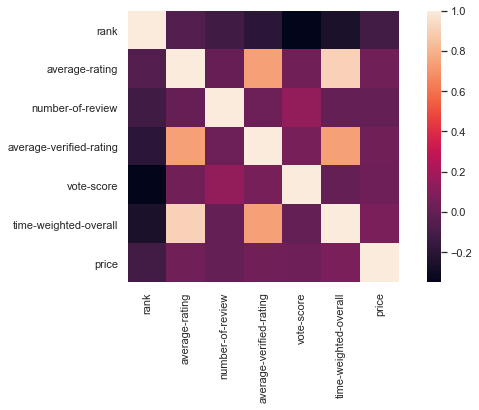

In [117]:
sns.heatmap(correlation, square=True)

## 6.0 Data Mining

### 6.1 Association Rule Mining (ARM)

In [118]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### 6.1.1 Also Buy Products

In [119]:
also_buy_table = product_table.drop(['title','also_view','rank','price'],axis = 1)
also_buy_table

also_buy        asin
0                                                     []  6546546450
1                               [B01E7LCSL6, B008X5RVME]  7178680776
2                                                     []  7250468162
3                                           [B0041PBXX8]  7367905066
4                                                     []  7414204790
...                                                  ...         ...
32483                                                 []  B01HIWLLUK
32484                                                 []  B01HJ1K3YK
32485  [B01KON9B4S, B079X3YFXS, B00M79OYS6, B000JN4CR...  B01HJ84SGM
32486                                                 []  B01HJASD20
32487  [B01HJEGQ6Q, B01L66EYCG, B00H7YZ7HI, B00CHKKWZ...  B01HJEGTYK

[32485 rows x 2 columns]

In [120]:
# separates each item in the list into a new row
also_buy_table = also_buy_table.explode('also_buy')
also_buy_table.reset_index(drop=True, inplace=True)

# cleaning up just to be safe
also_buy_table['also_buy'] = also_buy_table['also_buy'].str.strip()
also_buy_table.dropna(axis=0, subset=['also_buy'], inplace=True)
also_buy_table['also_buy'] = also_buy_table['also_buy'].astype('str')

# the product appear once in also buy (true, it was bought together)
also_buy_table['frequency'] = 1
also_buy_table

also_buy        asin  frequency
1       B01E7LCSL6  7178680776          1
2       B008X5RVME  7178680776          1
4       B0041PBXX8  7367905066          1
18      B00IWI42GU  9742121109          1
19      B005MZPP6M  9742121109          1
...            ...         ...        ...
128976  B011S54ES4  B01HJEGTYK          1
128977  B01DI91VCA  B01HJEGTYK          1
128978  B00CHKKWVI  B01HJEGTYK          1
128979  B0713RP29K  B01HJEGTYK          1
128980  B00P2SZBWM  B01HJEGTYK          1

[103052 rows x 3 columns]

In [121]:
# dropping products that does not exist in our product_table dataset
also_buy = also_buy_table[also_buy_table['also_buy'].isin(product_table['asin'])]
also_buy.reset_index(drop=True, inplace=True)
also_buy

also_buy        asin  frequency
0     B001E96P6O  B000052YAN          1
1     B0122ZKPHI  B000052YAN          1
2     B0013NB7DW  B0000530HU          1
3     B00UY2PRXE  B0000Y3DD2          1
4     B00EW7J1HK  B0000Y8IOQ          1
...          ...         ...        ...
2334  B01EBIY7HS  B01HG1BF9A          1
2335  B01E82O696  B01HG1BF9A          1
2336  B013ISARHG  B01HHAWG20          1
2337  B01DNS19J6  B01HHLKUCC          1
2338  B01D6JFM04  B01HIH2QTU          1

[2339 rows x 3 columns]

In [122]:
basket_ab = (also_buy.groupby(['asin', 'also_buy'])['frequency']
          .sum().unstack().reset_index().fillna(0)
          .set_index('asin')
         )
basket_ab

also_buy    B000052YAN  B00005JS5C  B00012FL8I  B000142J2W  B00015WOFS  \
asin                                                                     
B000052YAN         0.0         0.0         0.0         0.0         0.0   
B0000530HU         0.0         0.0         0.0         0.0         0.0   
B0000Y3DD2         0.0         0.0         0.0         0.0         0.0   
B0000Y8IOQ         0.0         0.0         0.0         0.0         0.0   
B000142J2W         0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
B01HFUXIGA         0.0         0.0         0.0         0.0         0.0   
B01HG1BF9A         0.0         0.0         0.0         0.0         0.0   
B01HHAWG20         0.0         0.0         0.0         0.0         0.0   
B01HHLKUCC         0.0         0.0         0.0         0.0         0.0   
B01HIH2QTU         0.0         0.0         0.0         0.0         0.0   

also_buy    B0001TMDF0  B00028LYO6  B0002JGIZA  B0002JHI1I  B0006O10P4  ...  \
asin                                                                    ...   
B000052YAN         0.0         0.0         0.0         0.0         0.0  ...   
B0000530HU         0.0         0.0         0.0         0.0         0.0  ...   
B0000Y3DD2         0.0         0.0         0.0         0.0         0.0  ...   
B0000Y8IOQ         0.0         0.0         0.0         0.0         0.0  ...   
B000142J2W         0.0         0.0         0.0         0.0         0.0  ...   
...                ...         ...         ...         ...         ...  ...   
B01HFUXIGA         0.0         0.0         0.0         0.0         0.0  ...   
B01HG1BF9A         0.0         0.0         0.0         0.0         0.0  ...   
B01HHAWG20         0.0         0.0         0.0         0.0         0.0  ...   
B01HHLKUCC         0.0         0.0         0.0         0.0         0.0  ...   
B01HIH2QTU         0.0         0.0         0.0         0.0         0.0  ...   

also_buy    B01HB4Y9AO  B01HBYF0CK  B01HBZNEHW  B01HD23OJG  B01HE4QV52  \
asin                                                                     
B000052YAN         0.0         0.0         0.0         0.0         0.0   
B0000530HU         0.0         0.0         0.0         0.0         0.0   
B0000Y3DD2         0.0         0.0         0.0         0.0         0.0   
B0000Y8IOQ         0.0         0.0         0.0         0.0         0.0   
B000142J2W         0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
B01HFUXIGA         0.0         0.0         0.0         0.0         0.0   
B01HG1BF9A         0.0         0.0         0.0         0.0         0.0   
B01HHAWG20         0.0         0.0         0.0         0.0         0.0   
B01HHLKUCC         0.0         0.0         0.0         0.0         0.0   
B01HIH2QTU         0.0         0.0         0.0         0.0         0.0   

also_buy    B01HEEJOQA  B01HFUTUBC  B01HG1BF9A  B01HHAWG20  B01HIHLFOC  
asin                                                                    
B000052YAN         0.0         0.0         0.0         0.0         0.0  
B0000530HU         0.0         0.0         0.0         0.0         0.0  
B0000Y3DD2         0.0         0.0         0.0         0.0         0.0  
B0000Y8IOQ         0.0         0.0         0.0         0.0         0.0  
B000142J2W         0.0         0.0         0.0         0.0         0.0  
...                ...         ...         ...         ...         ...  
B01HFUXIGA         0.0         0.0         0.0         0.0         0.0  
B01HG1BF9A         0.0         0.0         0.0         0.0         0.0  
B01HHAWG20         0.0         0.0         0.0         0.0         0.0  
B01HHLKUCC         0.0         0.0         0.0         0.0         0.0  
B01HIH2QTU         0.0         0.0         0.0         0.0         0.0  

[1272 rows x 1168 columns]

In [123]:
# support 
frequent_itemsets = apriori(basket_ab, min_support=0.01, use_colnames=True)
frequent_itemsets

support                  itemsets
0  0.022013              (B007Z5RTRK)
1  0.015723              (B00C4207LY)
2  0.010220              (B00ZGWVZB0)
3  0.018082              (B017CHORY8)
4  0.016509              (B018J05XSQ)
5  0.011792  (B007Z5RTRK, B018J05XSQ)

In [124]:
# confidence rule
rules1_ab = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
rules1_ab

antecedents   consequents  antecedent support  consequent support  \
0  (B007Z5RTRK)  (B018J05XSQ)            0.022013            0.016509   
1  (B018J05XSQ)  (B007Z5RTRK)            0.016509            0.022013   

    support  confidence      lift  leverage  conviction  
0  0.011792    0.535714  32.44898  0.011429    2.118287  
1  0.011792    0.714286  32.44898  0.011429    3.422956

In [125]:
# lift rule
rules2_ab = association_rules(frequent_itemsets, metric="lift", min_threshold=0.01)
rules2_ab

antecedents   consequents  antecedent support  consequent support  \
0  (B007Z5RTRK)  (B018J05XSQ)            0.022013            0.016509   
1  (B018J05XSQ)  (B007Z5RTRK)            0.016509            0.022013   

    support  confidence      lift  leverage  conviction  
0  0.011792    0.535714  32.44898  0.011429    2.118287  
1  0.011792    0.714286  32.44898  0.011429    3.422956

These products are bought together

[B018J05XSQ]: Mia secret acrylic powder is highly adaptable for any nail tech experience level.

[B00C4207LY]: Nail Art Accessories Real Dry Dried Flowers 12 Colors Bundle Set in Wheel - Ready to Use by Winstonia

Both are nail products


#### 6.1.3 Also View Products

In [126]:
also_view_table = product_table.drop(['title','also_buy','rank','price'],axis = 1)
also_view_table

also_view        asin
0                                                     []  6546546450
1                                                     []  7178680776
2                   [B01B8BR0O8, B01B8BR0NO, B014MHXXM8]  7250468162
3                                                     []  7367905066
4      [3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...  7414204790
...                                                  ...         ...
32483                                                 []  B01HIWLLUK
32484                                                 []  B01HJ1K3YK
32485  [B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...  B01HJ84SGM
32486                                                 []  B01HJASD20
32487                           [B06XNM7CGD, B071D7TMQS]  B01HJEGTYK

[32485 rows x 2 columns]

In [127]:
# Separates each item in the list into a new row
also_view_table = also_view_table.explode('also_view')
also_view_table.reset_index(drop=True, inplace=True)

# Cleaning up just to be safe
also_view_table['also_view'] = also_view_table['also_view'].str.strip()
also_view_table.dropna(axis=0, subset=['also_view'], inplace=True)
also_view_table['also_view'] = also_view_table['also_view'].astype('str')

# The product appear once in also buy (true, it was bought together)
also_view_table['frequency'] = 1
also_view_table = also_view_table[['asin', 'also_view','frequency']]
also_view_table

asin   also_view  frequency
2       7250468162  B01B8BR0O8          1
3       7250468162  B01B8BR0NO          1
4       7250468162  B014MHXXM8          1
6       7414204790  3254895630          1
7       7414204790  B007VL1D9S          1
...            ...         ...        ...
143314  B01HJ84SGM  B079X3YFXS          1
143315  B01HJ84SGM  B005DIBEXG          1
143316  B01HJ84SGM  B000HCMK90          1
143318  B01HJEGTYK  B06XNM7CGD          1
143319  B01HJEGTYK  B071D7TMQS          1

[118836 rows x 3 columns]

In [128]:
# Dropping products that does not exist in our product_table dataset
also_view = also_view_table[also_view_table['also_view'].isin(product_table['asin'])]
also_view.reset_index(drop=True, inplace=True)
also_view

asin   also_view  frequency
0     B000050B6B  B00009RB1C          1
1     B000050B6H  B0001HYLR0          1
2     B000052YAN  B001E96P6O          1
3     B000052YAN  B001F51RAG          1
4     B0000533AX  B001F51RAG          1
...          ...         ...        ...
1773  B01HCCP4GS  B018OB5466          1
1774  B01HE4QV52  B01E1QXTEW          1
1775  B01HFLLNXE  B01CWJHZW2          1
1776  B01HI1YKIG  B00M2J4HXI          1
1777  B01HI1YKIG  B00JCSLA6O          1

[1778 rows x 3 columns]

In [129]:
basket_av = (also_view.groupby(['asin', 'also_view'])['frequency']
          .sum().unstack().reset_index().fillna(0)
          .set_index('asin')
         )
basket_av

also_view   B000050B6H  B000068PBM  B00009RB0Y  B00009RB1C  B0000C4KJV  \
asin                                                                     
B000050B6B         0.0         0.0         0.0         1.0         0.0   
B000050B6H         0.0         0.0         0.0         0.0         0.0   
B000052YAN         0.0         0.0         0.0         0.0         0.0   
B0000533AX         0.0         0.0         0.0         0.0         0.0   
B000068PBJ         0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
B01H9073P8         0.0         0.0         0.0         0.0         0.0   
B01HCCP4GS         0.0         0.0         0.0         0.0         0.0   
B01HE4QV52         0.0         0.0         0.0         0.0         0.0   
B01HFLLNXE         0.0         0.0         0.0         0.0         0.0   
B01HI1YKIG         0.0         0.0         0.0         0.0         0.0   

also_view   B0000Y3DD2  B00012FL8I  B000142J2W  B00015WOF8  B00015WOFS  ...  \
asin                                                                    ...   
B000050B6B         0.0         0.0         0.0         0.0         0.0  ...   
B000050B6H         0.0         0.0         0.0         0.0         0.0  ...   
B000052YAN         0.0         0.0         0.0         0.0         0.0  ...   
B0000533AX         0.0         0.0         0.0         0.0         0.0  ...   
B000068PBJ         0.0         0.0         0.0         0.0         0.0  ...   
...                ...         ...         ...         ...         ...  ...   
B01H9073P8         0.0         0.0         0.0         0.0         0.0  ...   
B01HCCP4GS         0.0         0.0         0.0         0.0         0.0  ...   
B01HE4QV52         0.0         0.0         0.0         0.0         0.0  ...   
B01HFLLNXE         0.0         0.0         0.0         0.0         0.0  ...   
B01HI1YKIG         0.0         0.0         0.0         0.0         0.0  ...   

also_view   B01H67AB3A  B01H9073P8  B01HACL2Y8  B01HBZNEHW  B01HCCP4GS  \
asin                                                                     
B000050B6B         0.0         0.0         0.0         0.0         0.0   
B000050B6H         0.0         0.0         0.0         0.0         0.0   
B000052YAN         0.0         0.0         0.0         0.0         0.0   
B0000533AX         0.0         0.0         0.0         0.0         0.0   
B000068PBJ         0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
B01H9073P8         0.0         0.0         0.0         0.0         0.0   
B01HCCP4GS         0.0         0.0         0.0         0.0         0.0   
B01HE4QV52         0.0         0.0         0.0         0.0         0.0   
B01HFLLNXE         0.0         0.0         0.0         0.0         0.0   
B01HI1YKIG         0.0         0.0         0.0         0.0         0.0   

also_view   B01HE4QV52  B01HFWIKH0  B01HH1CDR2  B01HHWQX8G  B01HI1YKIG  
asin                                                                    
B000050B6B         0.0         0.0         0.0         0.0         0.0  
B000050B6H         0.0         0.0         0.0         0.0         0.0  
B000052YAN         0.0         0.0         0.0         0.0         0.0  
B0000533AX         0.0         0.0         0.0         0.0         0.0  
B000068PBJ         0.0         0.0         0.0         0.0         0.0  
...                ...         ...         ...         ...         ...  
B01H9073P8         0.0         0.0         0.0         0.0         0.0  
B01HCCP4GS         0.0         0.0         0.0         0.0         0.0  
B01HE4QV52         0.0         0.0         0.0         0.0         0.0  
B01HFLLNXE         0.0         0.0         0.0         0.0         0.0  
B01HI1YKIG         0.0         0.0         0.0         0.0         0.0  

[1155 rows x 1052 columns]

In [130]:
frequent_itemsets_2 = apriori(basket_av, min_support=0.01, use_colnames=True)
frequent_itemsets_2

support      itemsets
0  0.012121  (B007D1E83Y)
1  0.010390  (B0188CAZKQ)

In [131]:
rules1_av = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.001)
rules1_av

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [132]:
rules2_av = association_rules(frequent_itemsets_2, metric="lift", min_threshold=0.001)
rules2_av

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

#### 6.1.3 Also Buy and Also View Frequency Analysis

Also Buy Products

In [133]:
also_buy_f = also_buy.groupby(['also_buy']).count()
also_buy_f.rename(columns={'frequency':'also-buy-freq'},inplace=True)
also_buy_f.drop(['asin'], axis = 1, inplace=True)
also_buy_f.reset_index(inplace = True)
also_buy_f.rename(columns={'also_buy':'asin'},inplace=True)
also_buy_f

asin  also-buy-freq
0     B000052YAN              2
1     B00005JS5C              1
2     B00012FL8I              3
3     B000142J2W              1
4     B00015WOFS              1
...          ...            ...
1163  B01HEEJOQA              1
1164  B01HFUTUBC              1
1165  B01HG1BF9A              3
1166  B01HHAWG20              1
1167  B01HIHLFOC              1

[1168 rows x 2 columns]

In [134]:
mv2_review_table = (pd.merge(mv_review_table, also_buy_f, on='asin', how='left', indicator=True)).set_index('asin')
mv2_review_table.reset_index(inplace = True)
mv2_review_table['also-buy-freq'].fillna(0, inplace=True)
mv2_review_table.drop(['_merge'], axis=1, inplace=True)

mv2_review_table['also-buy-freq-range'] = pd.cut(mv2_review_table['also-buy-freq'],
                                                  [-1, 0, 10, 30], 
                                                  right=True,
                                                  labels=["0","(0, 10]","(10, 30]"])
mv2_review_table

asin      rank  average-rating  number-of-review  \
0      6546546450  0.844068             2.5                 2   
1      7178680776  0.250716             3.0                 1   
2      7250468162  0.274799             5.0                 1   
3      7367905066  0.537208             5.0                 1   
4      7414204790  0.019446             4.4                15   
...           ...       ...             ...               ...   
32078  B01HIWLLUK  0.616217             5.0                 1   
32079  B01HJ1K3YK  0.470987             1.0                 1   
32080  B01HJ84SGM  0.059576             5.0                 5   
32081  B01HJASD20  0.277377             1.0                 1   
32082  B01HJEGTYK  0.137335             3.0                10   

       average-verified-rating  vote-score  also-buy-freq also-buy-freq-range  
0                     4.000000    1.000000            0.0                   0  
1                     3.000000    0.000000            0.0                   0  
2                     5.000000    0.000000            0.0                   0  
3                     5.000000    0.000000            0.0                   0  
4                     4.461538    4.000000            0.0                   0  
...                        ...         ...            ...                 ...  
32078                 5.000000    0.000000            0.0                   0  
32079                 1.000000    0.000000            0.0                   0  
32080                 5.000000    0.000000            0.0                   0  
32081                 1.000000    1.000000            0.0                   0  
32082                 3.000000    4.809524            0.0                   0  

[32083 rows x 8 columns]

In [135]:
mv2_review_table["also-buy-freq-range"].value_counts()

0           30920
(0, 10]      1154
(10, 30]        9
Name: also-buy-freq-range, dtype: int64

Also View Products


In [136]:
also_view_f = also_view.groupby(['also_view']).count()
also_view_f.rename(columns={'frequency':'also-view-freq'},inplace=True)
also_view_f.drop(['asin'], axis = 1, inplace=True)
also_view_f.reset_index(inplace = True)
also_view_f.rename(columns={'also_view':'asin'},inplace=True)
also_view_f

asin  also-view-freq
0     B000050B6H               1
1     B000068PBM               1
2     B00009RB0Y               2
3     B00009RB1C               2
4     B0000C4KJV               5
...          ...             ...
1047  B01HE4QV52               1
1048  B01HFWIKH0               1
1049  B01HH1CDR2               1
1050  B01HHWQX8G               1
1051  B01HI1YKIG               1

[1052 rows x 2 columns]

In [137]:
mv3_review_table = (pd.merge(mv_review_table, also_view_f, on='asin', how='left', indicator=True)).set_index('asin')
mv3_review_table.reset_index(inplace = True)
mv3_review_table['also-view-freq'].fillna(0, inplace=True)
mv3_review_table.drop(['_merge'], axis=1, inplace=True)

mv3_review_table['also-view-freq-range'] = pd.cut(mv3_review_table['also-view-freq'],
                                                  [-1, 0, 10, 30], 
                                                  right=True,
                                                  labels=["0","(0, 10]","(10, 30]"])
mv3_review_table

asin      rank  average-rating  number-of-review  \
0      6546546450  0.844068             2.5                 2   
1      7178680776  0.250716             3.0                 1   
2      7250468162  0.274799             5.0                 1   
3      7367905066  0.537208             5.0                 1   
4      7414204790  0.019446             4.4                15   
...           ...       ...             ...               ...   
32078  B01HIWLLUK  0.616217             5.0                 1   
32079  B01HJ1K3YK  0.470987             1.0                 1   
32080  B01HJ84SGM  0.059576             5.0                 5   
32081  B01HJASD20  0.277377             1.0                 1   
32082  B01HJEGTYK  0.137335             3.0                10   

       average-verified-rating  vote-score  also-view-freq  \
0                     4.000000    1.000000             0.0   
1                     3.000000    0.000000             0.0   
2                     5.000000    0.000000             0.0   
3                     5.000000    0.000000             0.0   
4                     4.461538    4.000000             0.0   
...                        ...         ...             ...   
32078                 5.000000    0.000000             0.0   
32079                 1.000000    0.000000             0.0   
32080                 5.000000    0.000000             0.0   
32081                 1.000000    1.000000             0.0   
32082                 3.000000    4.809524             0.0   

      also-view-freq-range  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
32078                    0  
32079                    0  
32080                    0  
32081                    0  
32082                    0  

[32083 rows x 8 columns]

In [138]:
mv3_review_table["also-view-freq-range"].value_counts()

0           31033
(0, 10]      1047
(10, 30]        3
Name: also-view-freq-range, dtype: int64

### 6.2 Predictive Modeling

#### 6.2.1 Predictive Model for All Beauty Product's Sales Rank

In [139]:
#preparing required table
partial_product_table = product_table[['asin','price']]
#merging
merged_product_review_table = (pd.merge(merged_review_table, partial_product_table, on='asin', how='inner', indicator=True)).set_index('asin')
merged_product_review_table.reset_index(inplace = True)
merged_product_review_table = merged_product_review_table.drop(['_merge','rank'],axis = 1)
merged_product_review_table.rename(columns={'rank-binned':'rank'},inplace=True)

verified_rating_table = mv_review_table[['asin','average-verified-rating']][mv_review_table['average-verified-rating']>0]
merged_product_review_table = (pd.merge(merged_product_review_table, verified_rating_table, on='asin', how='inner', indicator=True)).set_index('asin')
merged_product_review_table.reset_index(inplace = True)
merged_product_review_table = merged_product_review_table.drop(['_merge','average-rating'],axis = 1)

time_score_table = new_mv_review_table_withTime[['asin','time-weighted-overall']]
merged_product_review_table = (pd.merge(merged_product_review_table, time_score_table, on='asin', how='inner', indicator=True)).set_index('asin')
merged_product_review_table.reset_index(inplace = True)
merged_product_review_table = merged_product_review_table.drop(['_merge','asin'],axis = 1)

#filtering
filter_price = merged_product_review_table['price'] > 0
#filter_num_review = merged_product_review_table['number-of-review'] <= 10
merged_product_review_table = merged_product_review_table[filter_price]
merged_product_review_table


number-of-review       rank  price  average-verified-rating  \
1                     1       Good  44.99                 3.000000   
2                     1       Good  28.76                 5.000000   
4                    15  Very Good  12.15                 4.461538   
11                    1       Good  24.99                 1.000000   
18                    1   Moderate  21.95                 1.000000   
...                 ...        ...    ...                      ...   
30422                41  Very Good   5.49                 3.850000   
30423                 5  Very Good  20.74                 4.200000   
30425                 1   Moderate   9.95                 5.000000   
30427                 5  Very Good  55.63                 5.000000   
30428                 1       Good  12.99                 1.000000   

       time-weighted-overall  
1                   2.834581  
2                   4.692989  
4                   3.831831  
11                  0.938140  
18                  0.660150  
...                      ...  
30422               3.545485  
30423               3.820223  
30425               4.436383  
30427               4.700168  
30428               0.883611  

[10728 rows x 5 columns]

In [140]:
#normalization
product_review_table = merged_product_review_table.drop(['rank'],axis = 1)
product_review_table = (product_review_table - product_review_table.min())/(product_review_table.max()-product_review_table.min())
product_review_table['rank'] = merged_product_review_table['rank']

product_review_table

number-of-review     price  average-verified-rating  \
1              0.000000  0.020931                 0.500000   
2              0.000000  0.013378                 1.000000   
4              0.003082  0.005649                 0.865385   
11             0.000000  0.011624                 0.000000   
18             0.000000  0.010209                 0.000000   
...                 ...       ...                      ...   
30422          0.008807  0.002550                 0.712500   
30423          0.000881  0.009646                 0.800000   
30425          0.000000  0.004625                 1.000000   
30427          0.000881  0.025882                 1.000000   
30428          0.000000  0.006040                 0.000000   

       time-weighted-overall       rank  
1                   0.538948       Good  
2                   0.938010       Good  
4                   0.753091  Very Good  
11                  0.131720       Good  
18                  0.072026   Moderate  
...                      ...        ...  
30422               0.691603  Very Good  
30423               0.750599  Very Good  
30425               0.882909   Moderate  
30427               0.939552  Very Good  
30428               0.120010       Good  

[10728 rows x 5 columns]

In [141]:
product_review_table.corr()

number-of-review     price  average-verified-rating  \
number-of-review                 1.000000 -0.029867                 0.004268   
price                           -0.029867  1.000000                 0.038019   
average-verified-rating          0.004268  0.038019                 1.000000   
time-weighted-overall           -0.020043  0.028474                 0.922421   

                         time-weighted-overall  
number-of-review                     -0.020043  
price                                 0.028474  
average-verified-rating               0.922421  
time-weighted-overall                 1.000000

In [142]:
#splitting test size
X = product_review_table.drop("rank", axis=1)  
# copy the labels to another dataframe/series
y = product_review_table["rank"].copy()  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)


In [143]:
#Model Training
model1 = MLPClassifier(hidden_layer_sizes =(4,5,3),max_iter=1000,random_state=1)
model1.fit(X_train,y_train)

model2 = KNeighborsClassifier(n_neighbors=20)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [144]:
predictionMLP = model1.predict(X_test)
predictionKNC = model2.predict(X_test)


In [145]:
print("The accuracy of model A is",accuracy_score(y_test, predictionMLP))
print("The accuracy of model B is",accuracy_score(y_test, predictionKNC))


The accuracy of model A is 0.6812674743709226
The accuracy of model B is 0.6146318732525629


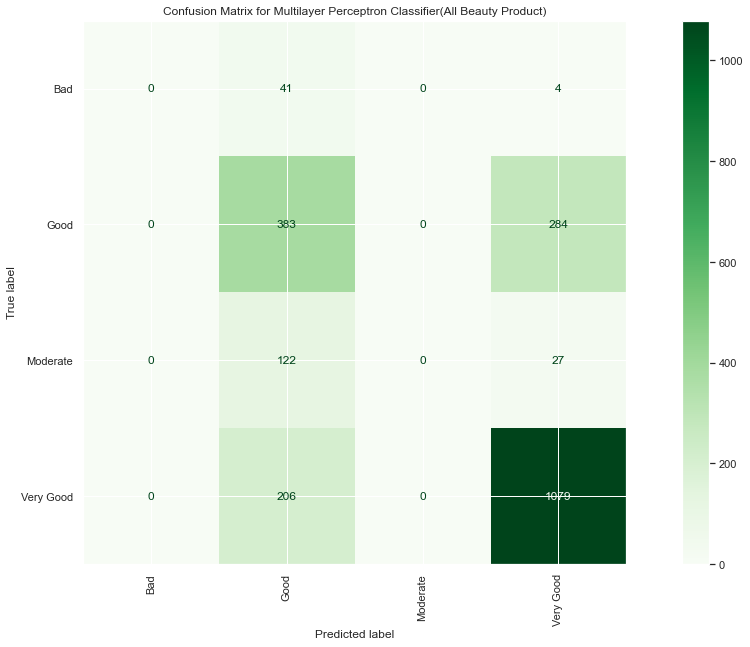

In [146]:
fig1,ax1 = plt.subplots(figsize = (20,10))
ax1.set_title("Confusion Matrix for Multilayer Perceptron Classifier(All Beauty Product)")
conf_matrix = confusion_matrix(y_test, predictionMLP)
mlp_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels = model1.classes_)
mlp_display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax1)

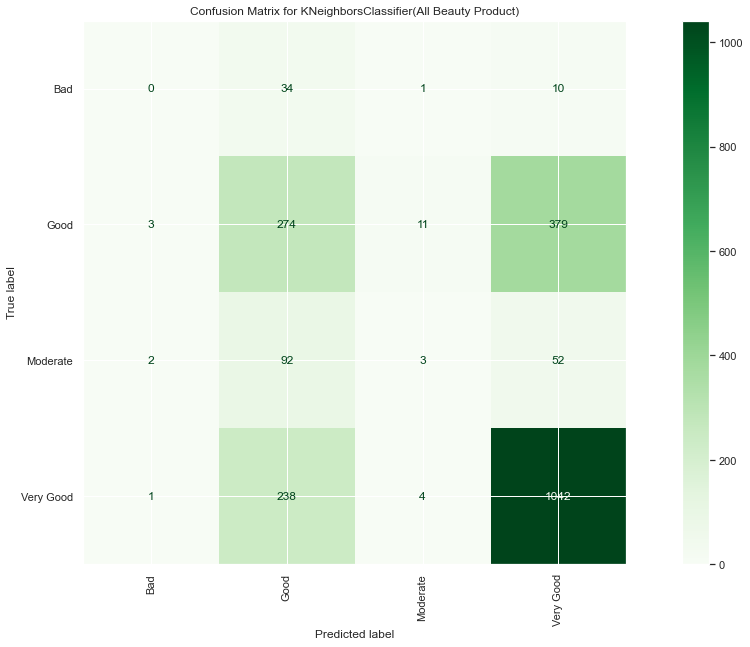

In [147]:
fig2,ax2 = plt.subplots(figsize = (20,10))
ax2.set_title("Confusion Matrix for KNeighborsClassifier(All Beauty Product)")
conf_matrix = confusion_matrix(y_test, predictionKNC)
mlp_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels = model2.classes_)
mlp_display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax2)

In [148]:
#ROC curve
encoder = LabelEncoder()
#predict probability
y_test = encoder.fit_transform(y_test)
pred_prob1 = model1.predict_proba(X_test)[:,1]
pred_prob2 = model2.predict_proba(X_test)[:,1]
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


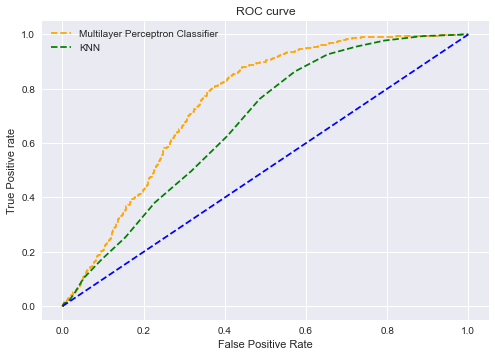

In [149]:
# matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Multilayer Perceptron Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

It is evident from the plot that the AUC for the Multilayer Perceptron Classifier ROC curve is higher than that for the KNeighborsClassifier ROC curve. Multilayer Perceptron Classifier has a higher true positive rate than KNeighborsClassifier. Therefore, we can say that Multilayer Perceptron Classifier did a better job of classifying the positive class in the dataset. 

####6.2.2 Predictive Model for Luxury Beauty Product's Sales Rank

We tried to predict for luxury beauty product's sales rank in order to verify the effectiveness of review in predicting product's sales rank.

In [150]:
#preparing required table
partial_luxuryBeautyProduct_table = luxuryBeautyProduct_table[['asin','price']]
#merging
merged_luxuryBeautyProduct_review_table = (pd.merge(luxuryBeautyReview_table_withTime, partial_luxuryBeautyProduct_table, on='asin', how='inner', indicator=True)).set_index('asin')
merged_luxuryBeautyProduct_review_table.reset_index(inplace = True)
merged_luxuryBeautyProduct_review_table  = merged_luxuryBeautyProduct_review_table .drop(['_merge','rank','asin','average-rating'],axis = 1)
merged_luxuryBeautyProduct_review_table.rename(columns={'rank-binned':'rank'},inplace=True)

#normalization
luxuryBeautyProduct_review_table = merged_luxuryBeautyProduct_review_table.drop(['rank'],axis = 1)
luxuryBeautyProduct_review_table= (luxuryBeautyProduct_review_table - luxuryBeautyProduct_review_table.min())/(luxuryBeautyProduct_review_table.max()-luxuryBeautyProduct_review_table.min())
luxuryBeautyProduct_review_table['rank'] = merged_luxuryBeautyProduct_review_table['rank']

luxuryBeautyProduct_review_table

number-of-review  average-verified-rating  time-weighted-overall  \
0              0.164407                 0.925969               0.736299   
1              0.001442                 0.800000               0.224920   
2              0.002019                 0.633333               0.169006   
3              0.022786                 0.974026               0.759892   
4              0.001154                 0.866667               0.370858   
...                 ...                      ...                    ...   
11808          0.006922                 0.866667               0.767151   
11809          0.003750                 0.900000               0.809123   
11810          0.002884                 1.000000               0.898717   
11811          0.000000                 0.200000               0.059516   
11812          0.000000                 1.000000               0.872190   

          price       rank  
0      0.016667  Very Good  
1      0.000000        Bad  
2      0.000000        Bad  
3      0.010000  Very Good  
4      0.000000   Moderate  
...         ...        ...  
11808  0.008861  Very Good  
11809  0.008861  Very Good  
11810  0.008861  Very Good  
11811  0.042222  Very Good  
11812  0.053333  Very Good  

[11813 rows x 5 columns]

In [151]:
#splitting test size
XX = luxuryBeautyProduct_review_table.drop("rank", axis=1)  
# copy the labels to another dataframe/series
yy = luxuryBeautyProduct_review_table["rank"].copy()  
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.20,random_state=1)

#Model Training
model1.fit(XX_train,yy_train)

luxuryBeautyPredictionMLP = model1.predict(XX_test)

print("The accuracy of model A is",accuracy_score(yy_test, luxuryBeautyPredictionMLP))

The accuracy of model A is 0.758781210325857


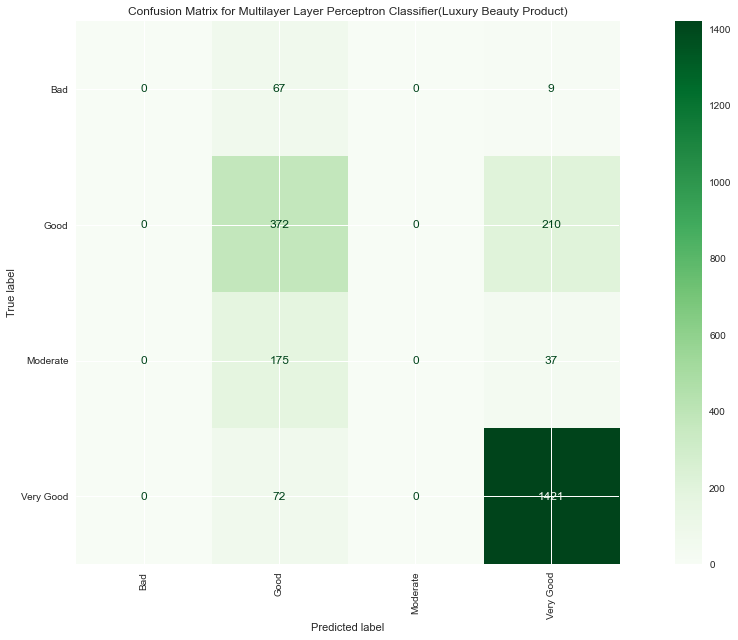

In [152]:
fig,ax = plt.subplots(figsize = (20,10))
ax.set_title("Confusion Matrix for Multilayer Layer Perceptron Classifier(Luxury Beauty Product)")
mlp_conf_matrix = confusion_matrix(yy_test, luxuryBeautyPredictionMLP)
display = ConfusionMatrixDisplay(confusion_matrix=mlp_conf_matrix,display_labels = model1.classes_)
display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax)

## 7.0 Data Visualization

### 7.1 Number of High Ratings VS Sales Rank
Will an increase in the number of high ratings (rating >= 4) affect the sales rank of a beauty product?


In [153]:
mx = m.copy()
mx['ratio-high-to-total'] = mx['number-of-high-rating-review']/mx['number-of-review']
mx['average-rating-range'] = pd.cut(mx['average-rating'],
                                    [0, 3, 4, 6], 
                                    right=False,
                                    labels=["[1, 3)","[3, 4)","[4, 5]"])
mx

asin      rank  average-rating  number-of-review rank-binned  \
0      6546546450  0.844068             2.5                 2         Bad   
1      7178680776  0.250716             3.0                 1        Good   
2      7250468162  0.274799             5.0                 1        Good   
3      7367905066  0.537208             5.0                 1    Moderate   
4      7414204790  0.019446             4.4                15   Very Good   
...           ...       ...             ...               ...         ...   
32078  B01HIWLLUK  0.616217             5.0                 1    Moderate   
32079  B01HJ1K3YK  0.470987             1.0                 1        Good   
32080  B01HJ84SGM  0.059576             5.0                 5   Very Good   
32081  B01HJASD20  0.277377             1.0                 1        Good   
32082  B01HJEGTYK  0.137335             3.0                10   Very Good   

       number-of-high-rating-review  number-of-low-rating-review  \
0                                 1                            1   
1                                 0                            1   
2                                 1                            0   
3                                 1                            0   
4                                13                            2   
...                             ...                          ...   
32078                             1                            0   
32079                             0                            1   
32080                             5                            0   
32081                             0                            1   
32082                             4                            6   

       ratio-high-to-total average-rating-range  
0                 0.500000               [1, 3)  
1                 0.000000               [3, 4)  
2                 1.000000               [4, 5]  
3                 1.000000               [4, 5]  
4                 0.866667               [4, 5]  
...                    ...                  ...  
32078             1.000000               [4, 5]  
32079             0.000000               [1, 3)  
32080             1.000000               [4, 5]  
32081             0.000000               [1, 3)  
32082             0.400000               [3, 4)  

[30979 rows x 9 columns]

In [154]:
mx.corr()

rank  average-rating  number-of-review  \
rank                          1.000000       -0.065697         -0.419714   
average-rating               -0.065697        1.000000         -0.011613   
number-of-review             -0.419714       -0.011613          1.000000   
number-of-high-rating-review -0.414280        0.134331          0.954098   
number-of-low-rating-review  -0.295049       -0.317108          0.772807   
ratio-high-to-total          -0.064359        0.930976         -0.008575   

                              number-of-high-rating-review  \
rank                                             -0.414280   
average-rating                                    0.134331   
number-of-review                                  0.954098   
number-of-high-rating-review                      1.000000   
number-of-low-rating-review                       0.547263   
ratio-high-to-total                               0.142145   

                              number-of-low-rating-review  ratio-high-to-total  
rank                                            -0.295049            -0.064359  
average-rating                                  -0.317108             0.930976  
number-of-review                                 0.772807            -0.008575  
number-of-high-rating-review                     0.547263             0.142145  
number-of-low-rating-review                      1.000000            -0.325177  
ratio-high-to-total                             -0.325177             1.000000

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


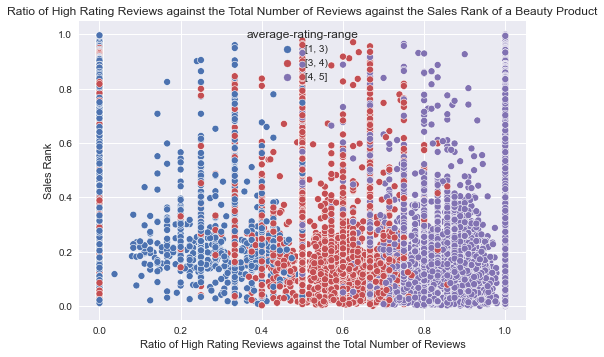

In [155]:
plt.title('Ratio of High Rating Reviews against the Total Number of Reviews against the Sales Rank of a Beauty Product')
plt.ylabel('Sales Rank')
plt.xlabel('Ratio of High Rating Reviews against the Total Number of Reviews')
plot=sns.scatterplot(x="ratio-high-to-total", y="rank", data=mx, hue='average-rating-range', palette=["C0","C2","C3"])

The plotted graph is observed to have a weak negative association. This may be due to the imbalance of number of high rating reviews( 4) and number of low rating reviews(3). Although this graph showed a weak association between the two variables, we can observe that most of the points are distributed loosely at the lower right corner of the graph from the scatter plot above. This implies that the higher the ratio of the number of high rating reviews to the total number of reviews, the higher the sales rank the product is.

If a product receives a good amount of high rating reviews, the sales rank is believed to be better.


### 7.2 Average Rating VS Sales Rank 
What is the correlation between average rating of products and sales rank? Does higher average rating implies higher sales? 

<AxesSubplot:xlabel='average-rating', ylabel='rank'>

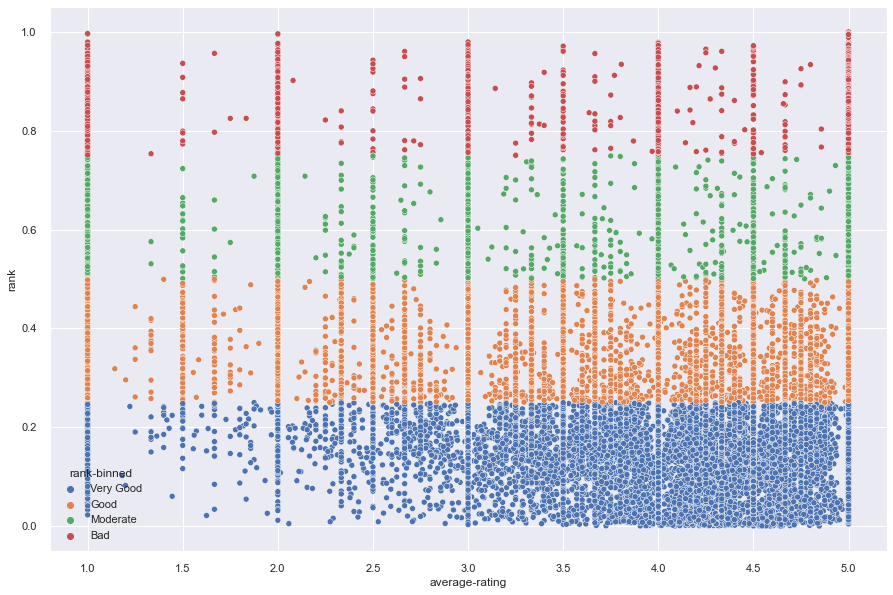

In [156]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='average-rating', y='rank', data = merged_review_table, hue='rank-binned')

Based on our finding, the average rating of products has weak correlation with sales rank. This is because there are many confounding factors, as we need to take in consideration the time of the review, verification, content of the review as well. Simply take average rating cannot clearly imply the sales rank.


### 7.3 Number of Reviews VS Sales Rank
What is the correlation between number of reviews and sales rank? Does higher number of reviews implies higher sales rank?


[Text(0.5, 0, 'Total Number of Reviews'),
 Text(0, 0.5, 'Sales Rank'),
 Text(0.5, 1.0, 'Total Number of Reviews against Sales Rank')]

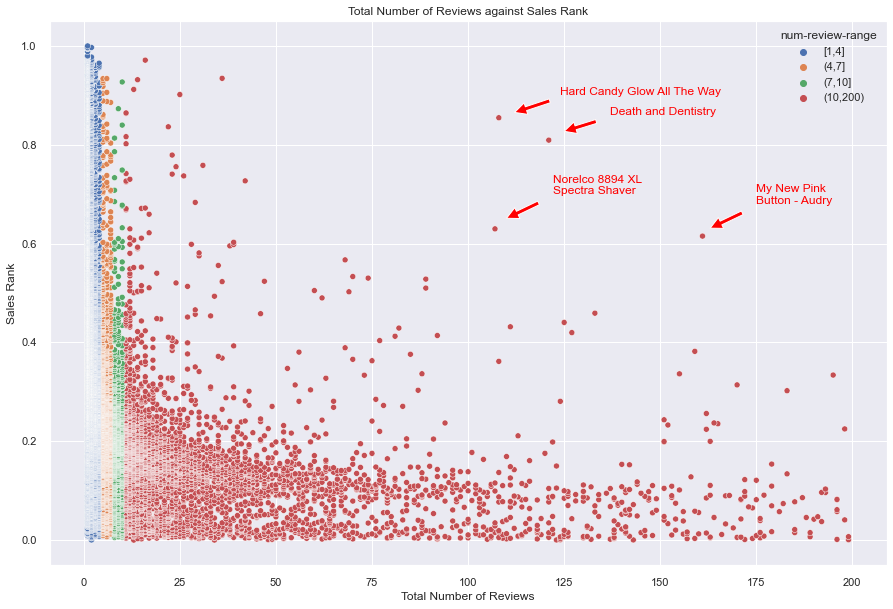

In [157]:
sns.set(rc={'figure.figsize':(15,10)})
sttrplt=sns.scatterplot(x='number-of-review', y='rank', data = num_review_filter, hue='num-review-range')
plt.annotate(
# Label and coordinate
'Hard Candy Glow All The Way', xy=(110,0.86), xytext=(124, 0.9), color= "red", arrowprops={"facecolor": 'red', "shrink": 0.15}
)
plt.annotate(
# Label and coordinate
'Death and Dentistry', xy=(122,0.82), xytext=(137, 0.86), color= "red", arrowprops={"facecolor": 'red', "shrink": 0.20}
)
plt.annotate(
# Label and coordinate
'Norelco 8894 XL \nSpectra Shaver', xy=(107,0.64), xytext=(122, 0.70), color= "red", arrowprops={"facecolor": 'red', "shrink": 0.20}
)
plt.annotate(
# Label and coordinate
'My New Pink \nButton - Audry', xy=(160,0.62), xytext=(175, 0.68), color= "red", arrowprops={"facecolor": 'red', "shrink": 0.20}
)

sttrplt.set(xlabel='Total Number of Reviews', 
            ylabel='Sales Rank', 
            title="Total Number of Reviews against Sales Rank")


From the scatter plot above, the graph showed a moderate non linear association between the total number of reviews and sales rank. When the total number of reviews increases, the sales rank of the product will be better until the total number of reviews reaches approximately 50 reviews. After 50 number of reviews, the sales rank of the product started to remain constant. This can be concluded that 50 reviews are the optimal number of reviews for a beauty product in our case. However, there are some exceptions to some products which are located at the top right corner of the graph.


### 7.4 Price V.S. Sales Rank
What is the correlation between the pricing of products and sales rank? 

[Text(0.5, 0, 'Price of Beauty Product'),
 Text(0, 0.5, 'Sales Rank'),
 Text(0.5, 1.0, 'Price of Beauty Products against Sales Rank')]

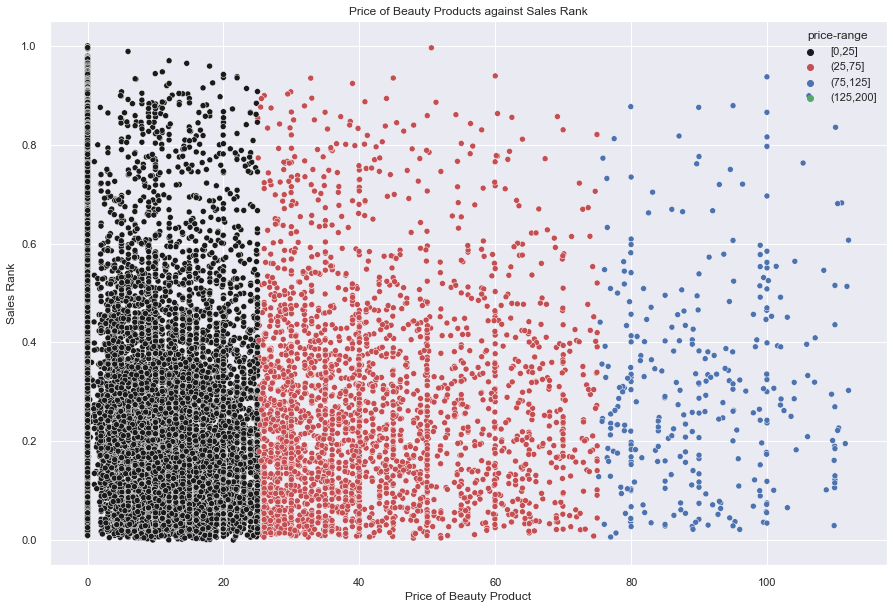

In [158]:
plt.figure(figsize = (15,10))
price_rank_graph = sns.scatterplot(x='price', 
                                 y='rank',
                                 data=merged_price_table, hue='price-range',palette=["k", "C3","C0","C2"])

price_rank_graph .set(xlabel='Price of Beauty Product', 
                   ylabel='Sales Rank', 
                   title="Price of Beauty Products against Sales Rank")

Based on the scatter plot above, the price of products has a weak negative correlation with sales rank. This is because there are many confounding factors, as we need to take in consideration the time of the review, verification, content of the review as well. Simply taking the price of the product cannot clearly imply the sales rank. 



### 7.5 Review Up Votes V.S. Sales Rank
Will the number of review upvotes affect the number of buyers? 


[Text(0.5, 0, 'Vote Score'),
 Text(0, 0.5, 'Sales Rank'),
 Text(0.5, 1.0, 'Vote Score of a Product against Sales Rank')]

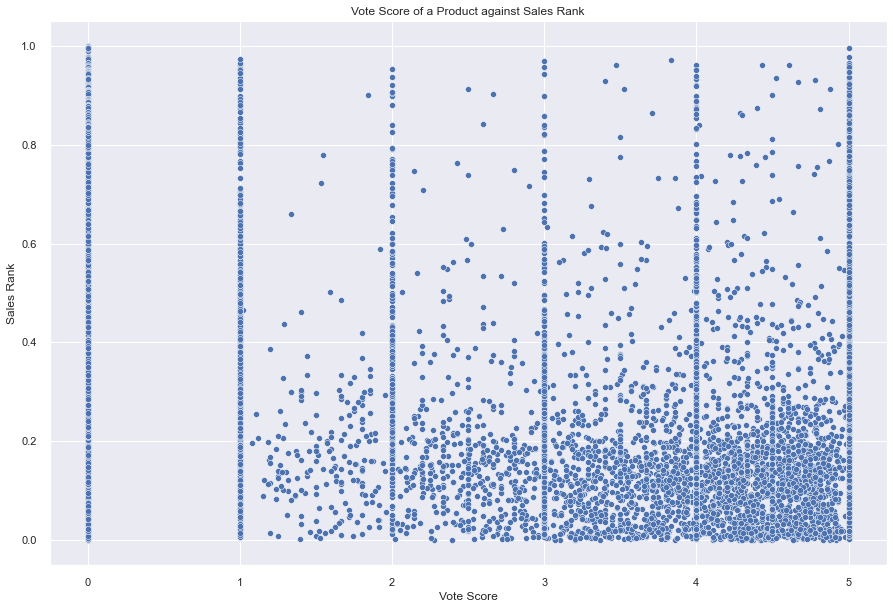

In [159]:
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x='vote-score',y='rank',data=mv_review_table)

ax.set(xlabel='Vote Score', 
       ylabel='Sales Rank', 
       title="Vote Score of a Product against Sales Rank")

The vote score has -0.3511 of correlation value with sales rank. The higher the vote score, the lower (better) the sales rank. This shows that customers might somehow feel more “secure” to buy products that have a good up vote. The sense of having support from the community will enhance the chances of customers buying the product.

 ### 7.6 Timeframe and Reviews
 Do people in the current decade prioritise online reviews more compared to the last decade?

In [160]:
timeframe = dfMergedInner[['year', 'month']].copy().groupby(['year']).count()
timeframe.rename(columns={'month':'number-of-review'},inplace=True)
timeframe.reset_index(inplace = True)
timeframe['cum-number-of-review'] = timeframe['number-of-review'].cumsum()
timeframe

year  number-of-review  cum-number-of-review
0   2000                10                    10
1   2001                65                    75
2   2002                77                   152
3   2003               118                   270
4   2004               290                   560
5   2005               559                  1119
6   2006               943                  2062
7   2007              3048                  5110
8   2008              3610                  8720
9   2009              3940                 12660
10  2010              4951                 17611
11  2011              6373                 23984
12  2012              9179                 33163
13  2013             25278                 58441
14  2014             37277                 95718
15  2015             65817                161535
16  2016             97984                259519
17  2017             67940                327459
18  2018             29818                357277

[Text(0.5, 1.0, 'Total Number of Reviews throughout the Years'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Total Number of Beauty Product Reviews')]

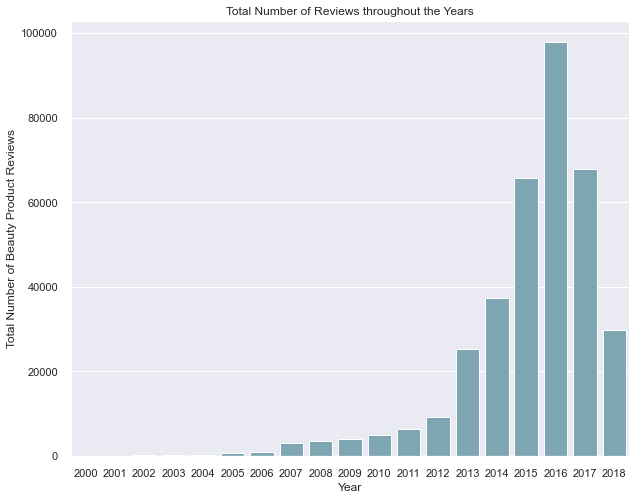

In [161]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x="year", y="number-of-review", data=timeframe, color="C9", saturation=.5)

ax.set(title='Total Number of Reviews throughout the Years',
       xlabel='Year',
       ylabel='Total Number of Beauty Product Reviews')

[Text(0.5, 1.0, 'Cumulative Number of Reviews throughout the Years'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Cumulative Number of Beauty Product Reviews')]

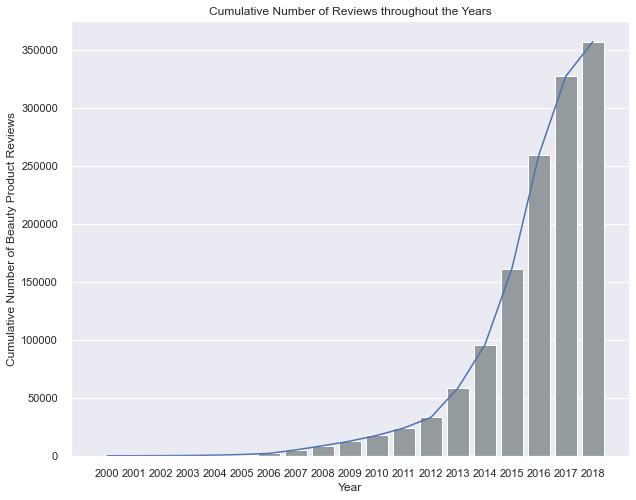

In [162]:
plt.figure(figsize = (10,8))
ax=sns.barplot(x="year", y="cum-number-of-review", data=timeframe, color="C9", saturation=.1)
sns.lineplot(x="year", y="cum-number-of-review", data=timeframe).plot(secondary_y=True)
ax.set(title='Cumulative Number of Reviews throughout the Years',
       xlabel='Year',
       ylabel='Cumulative Number of Beauty Product Reviews')

From the bar graph above, the bar chart shows a cumulative number of reviews for each year since 2000 to 2018. The total cumulative number of reviews increased steadily from the year 2000 to the year 2012. It began to go up dramatically ever since the year 2013, until the year 2017. In the end, the total cumulative number of reviews reached 357283 in the year 2018. We can observe that people in the last decade(year 2001 Jan 1 - 2009 Dec 31) make less reviews than the people in the current decade(year 2010 Jan 1 - 2019 Dec 31).

A conclusion can be drawn that people in the current decade prioritise online reviews more compared to the last decade.


### 7.7 Also Buy and Also View of the Product Reviews
Will a product with a high average rating appear more frequently in other products’ also_view / also_buy?


High Average Rating appearing more frequently in also_buy?

<AxesSubplot:xlabel='average-rating', ylabel='rank'>

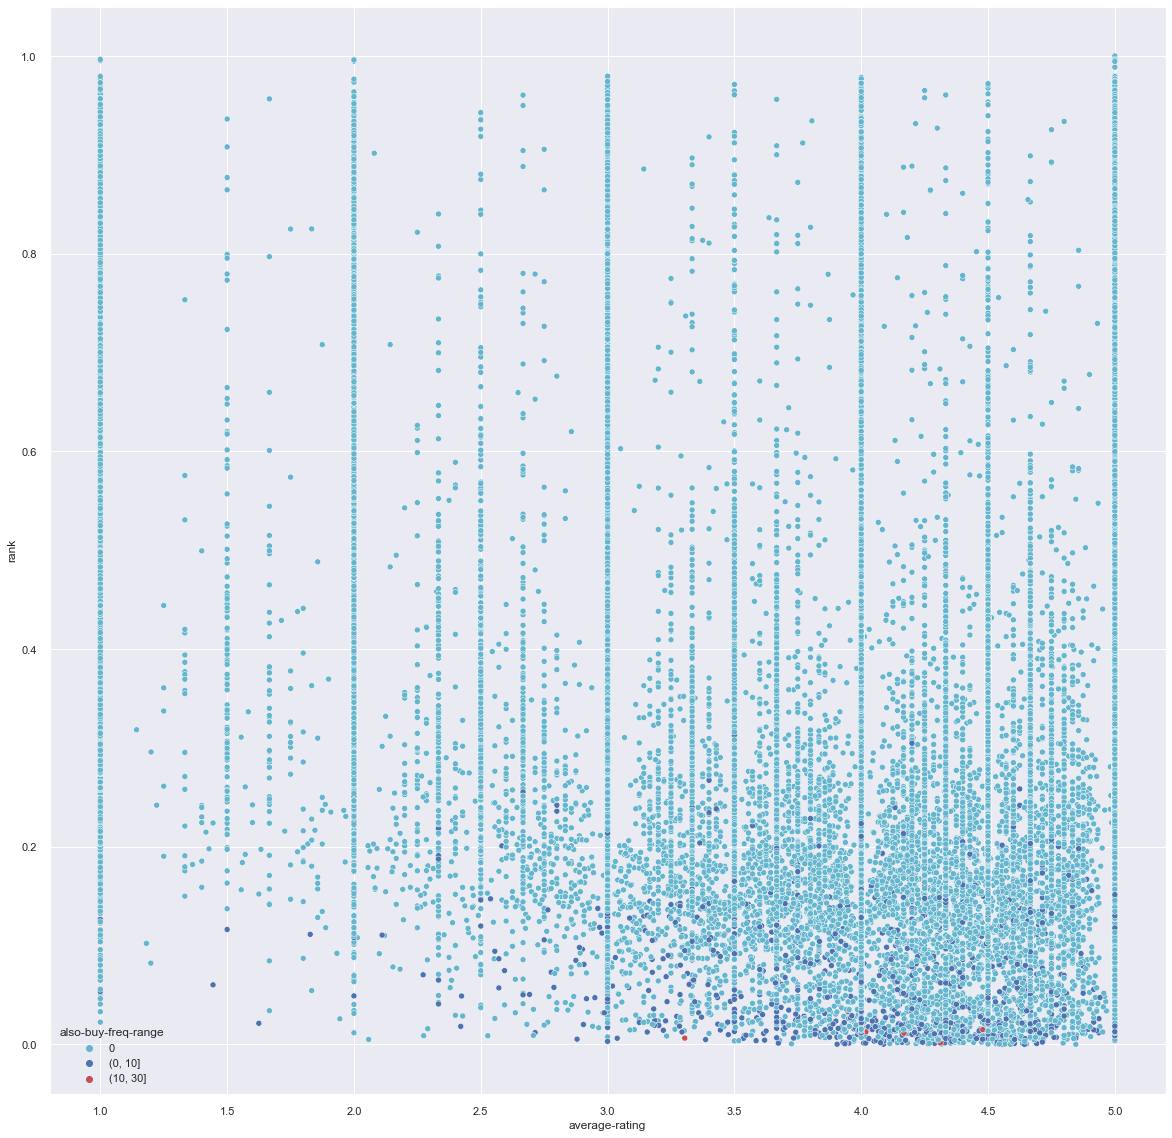

In [163]:
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(x='average-rating', y='rank', data = mv2_review_table, hue='also-buy-freq-range', palette=["C9","C0","C3"])

This scatter plot shows the average rating of the beauty products against the sales rank. Each point is colored in a different hue to show the frequency of their appearance in other products’ also_buy section. It is shown that products with a high average rating do not appear very often in other products’ also_buy. However, those products that show up more in other products’ also_buy are scattered around different ranges of average rating.

From our dataset, it is clear that a product with high average rating does not appear more frequently in other products’ also_buy.


High Average Rating appearing more frequently in also_view?

<AxesSubplot:xlabel='average-rating', ylabel='rank'>

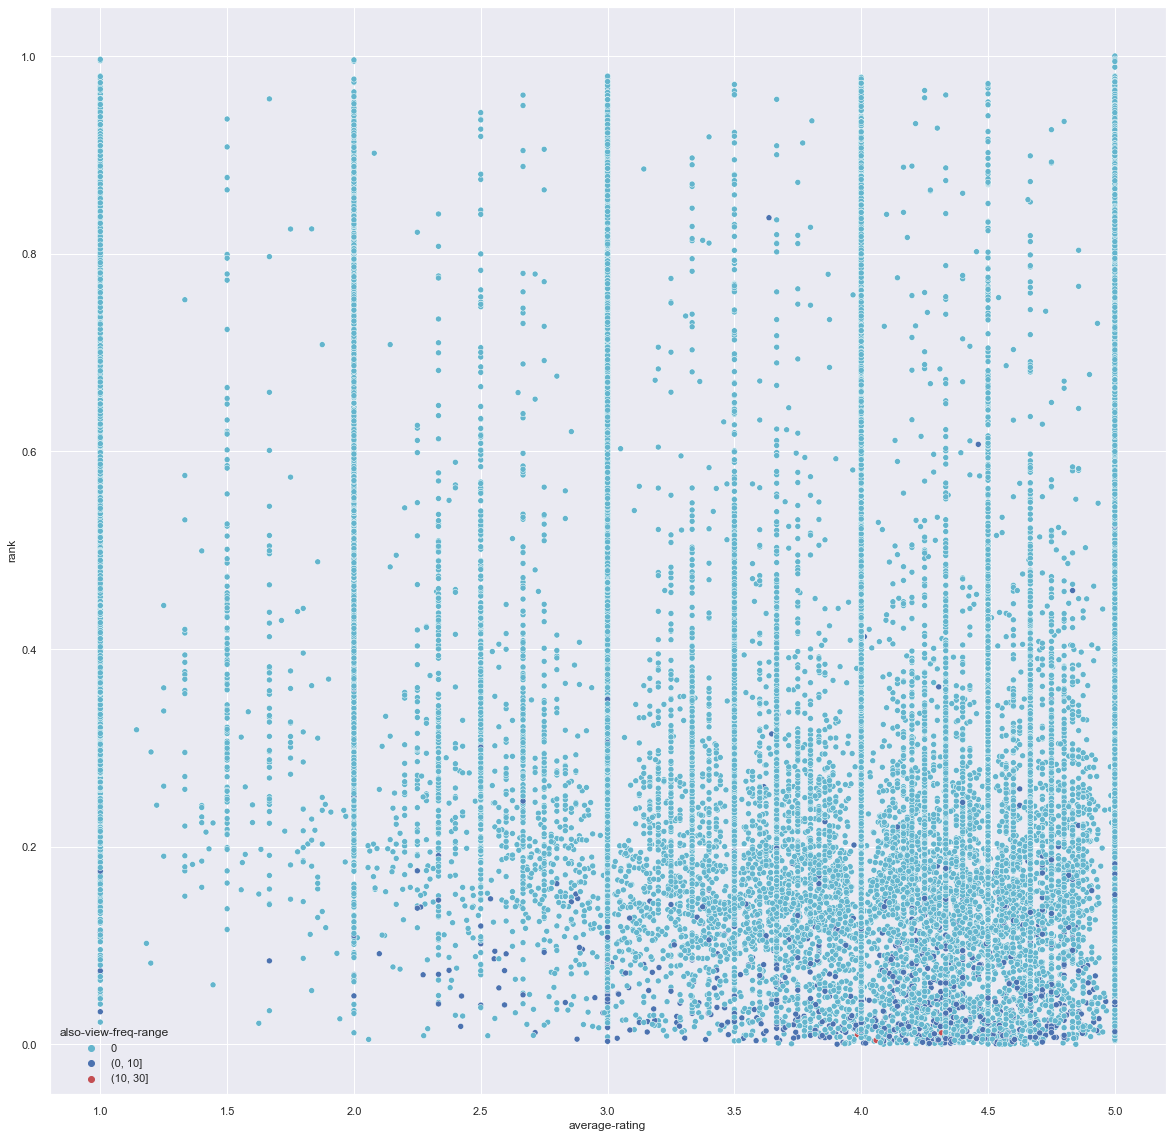

In [164]:
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(x='average-rating', y='rank', data = mv3_review_table, hue='also-view-freq-range', palette=["C9","C0","C3"])

This scatter plot shows the average rating of the beauty products against the sales rank. Each point is colored in a different hue to show the frequency of their appearance in other products’ also_view section. It is shown that products with a high average rating do not appear very often in other products’ also_view. However, those products that show up more in other products’ also_buy are scattered around different ranges of average rating.

From our dataset, it is clear that a product with a high average rating does not appear more frequently in other products’ also_view.


### 7.8 Prediction Accuracy for Luxury Beauty Products
Given the proposed hypothesis, the classification model is able to make correct predictions for the sales rank of beauty products with a high accuracy. Is this hypothesis also true for luxury beauty products? By using the same model, can we predict the sales rank of luxury beauty products with high accuracy as well?




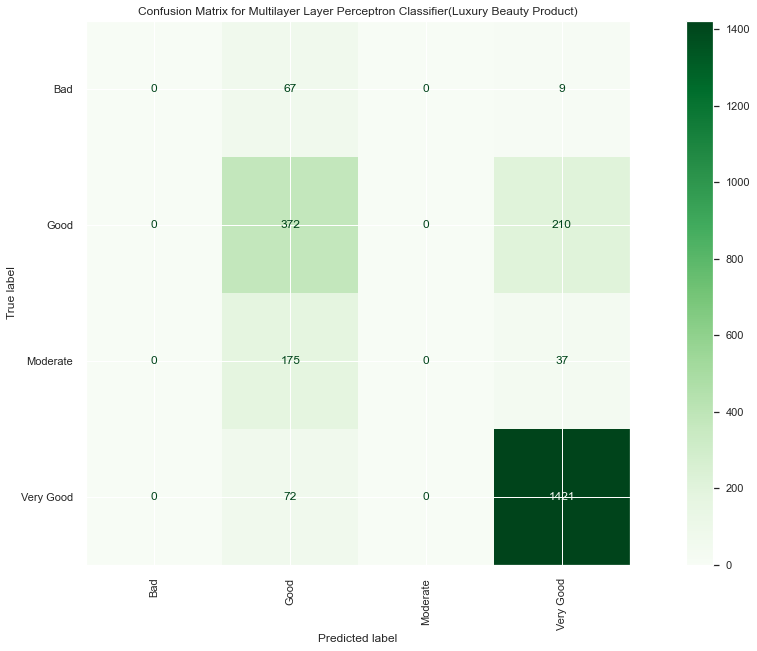

In [165]:
fig,ax = plt.subplots(figsize = (20,10))
ax.set_title("Confusion Matrix for Multilayer Layer Perceptron Classifier(Luxury Beauty Product)")
mlp_conf_matrix = confusion_matrix(yy_test, luxuryBeautyPredictionMLP)
display = ConfusionMatrixDisplay(confusion_matrix=mlp_conf_matrix,display_labels = model1.classes_)
display.plot(cmap = 'Greens',xticks_rotation ='vertical',ax=ax)

The model, Multilayer Perceptron Classifier that we have built has been used to predict the sales rank of the luxury beauty product. In this study, we want to verify the effectiveness of this model  in predicting the sales rank of a product. From the previous study, an accuracy of 68% has been obtained in predicting the sales rank of all beauty products by using a Multilayer Perceptron Classifier with review data. We hypothesize that this model can be used  to predict sales rank of other products. Finally, the classification model has been tested using the prepared test sets and obtained an accuracy score of 75% for this model. Below showed the confusion matrix for the Multilayer Perceptron Classifier

Based on the confusion matrix, both of the models have a very high accuracy in predicting very good and good sales rank compared to other types of sales rank. There are no moderate and bad sales ranks that have been predicted correctly. This may be caused by the data imbalance issue in our dataset. Most of the luxury beauty products in our dataset have a very high sales rank, indicating that the products are selling well. This problem can be solved by using data augmentation to balance the dataset in the future. 

We can draw a conclusion that the hypothesis is correct. By using the same combination of descriptors which consists of review data, we are able to predict the sales rank of luxury beauty products with high accuracy of 75%.





## Conclusion

Our first finding is that sales rank is affected by numbers of reviews, high rating reviews, verified true reviews, voted review and timing of the reviews. This finding gives us a better view on how product reviews would actually affect sales. Marketing executives should spend efforts on getting quality reviews from customers as it will boost their product trustworthiness as well as increase sales indirectly. Beside that, marketing executives have to keep their review “updated” as well. Old reviews are less effective than latest reviews. 

Beside that we also built a model that could predict which product can potentially receive high sales rank based on its reviews. We developed a model as shown in 5.2 that has an accuracy of 68% by using a Multilayer Perceptron Classifier with review data after compared with KNeighborsClassifier which has lower value in our evaluation matrix, ROC. We used the same model and tuned again with its data on another category of beauty products called “Luxury Beauty” products and received the accuracy of 75%. This is a small leap of success for us to potentially predict which product has good potential according to their reviews.

Last but not least, we still have a huge room of improvement. Our future improvements should focus on continuously improving the accuracy of our model. Our data might be slightly skewed to high rating products. We might need to perform data augmentation to train for lower rating classification. Through the exploration of the data, we also identified a few interesting outliers that don't follow our models. Most of them are because they are not exactly the same category with the beauty product. Same some of them might have really outdated reviews.
